<a href="https://colab.research.google.com/github/Kanlaya13/Streamlit/blob/main/FWD101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pygsheets

In [8]:
pip install pythainlp

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.4/13.4 MB 20.9 MB/s eta 0:00:00


## Import Library and Clean Data

In [9]:
import pygsheets
import google.auth
from google.colab import auth
import warnings
import numpy as np
import re
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import matplotlib as mpl
from sklearn.decomposition import PCA
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus import common
from pythainlp.corpus.common import thai_words
from pythainlp import Tokenizer

# set maximum row to unlimit
pd.options.display.max_rows = 999
warnings.filterwarnings('ignore')
auth.authenticate_user() #access google
credentials, _ = google.auth.default()
gc = pygsheets.client.Client(credentials)

In [10]:
sheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/17d_Mw2JR-08A4IsTZIl2zwbW-iVzkhz4GUaatBa92Fo/edit?usp=sharing')
#Get data from google sheet
df_trans = sheet.sheet1.get_as_df()
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    351 non-null    object
 1   source  351 non-null    object
dtypes: object(2)
memory usage: 5.6+ KB


In [ ]:
df_trans

In [12]:
data = pd.read_csv('https://raw.githubusercontent.com/baeby0329/scraping_insurance_from_pantip/main/scraping_pantip_tag.csv', index_col=0)
data

text  source
0     ‡∏ö‡∏¥‡πä‡∏Å‡πÑ‡∏ö‡∏Ñ‡πå‡πÄ‡∏Å‡∏¥‡∏î‡∏≠‡∏∏‡∏ö‡∏±‡∏ï‡∏¥‡πÄ‡∏´‡∏ï‡∏∏‡πÄ‡∏≠‡∏á‡πÉ‡∏ö‡∏Ç‡∏±‡∏ö‡∏Ç‡∏µ‡πà‡∏´‡∏°‡∏î 3 ‡∏õ‡∏µ ‡∏õ‡∏£‡∏∞‡∏Å...  pantip
1     ‡∏£‡∏ñ‡∏ö‡∏¥‡πä‡∏Ñ‡πÑ‡∏ö‡∏Ñ‡πå‡πÄ‡∏Å‡∏¥‡∏î‡∏≠‡∏∏‡∏ö‡∏±‡∏ï‡∏¥‡πÄ‡∏´‡∏ï‡∏∏‡πÄ‡∏≠‡∏á‡πÉ‡∏ö‡∏Ç‡∏±‡∏ö‡∏Ç‡∏µ‡πà‡∏´‡∏°‡∏î 3 ‡∏õ‡∏µ ‡∏õ‡∏£...  pantip
2     ‡πÄ‡∏õ‡πá‡∏ô‡∏ô‡∏≤‡∏¢‡∏´‡∏ô‡πâ‡∏≤‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏ß‡∏¥‡∏ô‡∏≤‡∏®‡∏†‡∏±‡∏¢‡∏™‡πà‡∏á‡∏á‡∏≤‡∏ô‡πÄ‡∏≠‡∏á ‡∏Å‡∏±‡∏ö‡∏™‡πà‡∏á‡∏á‡∏≤‡∏ô‡∏ú‡πà...  pantip
3     ‡πÄ‡∏û‡∏¥‡πà‡∏á‡∏™‡∏≠‡∏ö‡∏ú‡πà‡∏≤‡∏ô‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡πá‡∏ô‡∏ô‡∏≤‡∏¢‡∏´‡∏ô‡πâ‡∏≤‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏ß‡∏¥‡∏ô‡∏≤‡∏®‡∏†‡∏±‡∏¢‡∏°‡∏≤ ‡πÅ‡∏•‡∏∞...  pantip
4                                           ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏£‡∏ñ‡∏Ñ‡∏≠‡∏Å  pantip
...                                                 ...     ...
2115  ‡∏Å‡∏π‡πâ‡πÄ‡∏á‡∏¥‡∏ô ‡∏ò‡∏ô‡∏≤‡∏Ñ‡∏≤‡∏£‡∏≠‡∏ô‡∏∏‡∏°‡∏±‡∏ï‡∏¥‡∏ß‡∏á‡πÄ‡∏á‡∏¥‡∏ô‡∏ö‡πâ‡∏≤‡∏ô4,792,217‡∏ö‡∏≤‡∏óMRT...  pantip
2116                ‡∏™‡∏¥‡∏ô‡πÄ‡∏ä‡∏∑‡πà‡∏≠‡∏ã‡πà‡∏≠‡∏°‡πÅ‡∏ã‡∏°‡∏ö‡πâ‡∏≤‡∏ô‡∏ö‡∏ô‡∏ó‡∏µ‡πà‡∏î‡∏¥‡∏ô‡∏£‡∏≤‡∏ä‡∏û‡∏±‡∏™‡∏î‡∏∏  pantip
2117  ‡∏£‡∏ö‡∏Å‡∏ß‡∏ô‡∏™‡∏≠‡∏ö‡∏ñ‡∏≤‡∏°‡∏ú‡∏π‡πâ‡∏£‡∏π‡πâ‡∏Ñ‡πà‡∏∞ ‡∏ó‡∏µ‡πà‡∏ö‡πâ‡∏≤‡∏ô‡πÄ‡∏ä‡πà‡∏≤‡∏ó‡∏µ‡πà‡∏î‡∏¥‡∏ô‡∏£‡∏≤‡∏ä‡∏û‡∏±‡∏™‡∏î‡∏∏...  pantip
2118  ‡∏ô‡∏≠‡∏ô‡∏£‡∏û.‡πÄ‡∏•‡∏¢‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà‡∏´‡∏°‡∏î‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏ä‡∏î‡πÄ‡∏ä‡∏¢‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ ‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡πÄ‡∏Ñ‡∏•‡∏°...  pantip
2119  ‡∏û‡∏≠‡∏î‡∏µ‡∏ú‡∏°‡∏õ‡∏£‡∏∞‡∏™‡∏ö‡∏≠‡∏∏‡∏ö‡∏±‡∏ï‡∏¥‡πÄ‡∏´‡∏ï‡∏∏‡∏Ç‡∏≤‡∏´‡∏±‡∏Å ‡πÄ‡∏Ç‡πâ‡∏≤‡πÅ‡∏≠‡∏î‡∏°‡∏¥‡∏ó‡∏£‡∏û.13‡∏Å‡∏∏‡∏°‡∏†...  pantip

[2120 rows x 2 columns]

In [13]:
merged_data = pd.concat([data, df_trans], ignore_index=True)
merged_data

text  source
0     ‡∏ö‡∏¥‡πä‡∏Å‡πÑ‡∏ö‡∏Ñ‡πå‡πÄ‡∏Å‡∏¥‡∏î‡∏≠‡∏∏‡∏ö‡∏±‡∏ï‡∏¥‡πÄ‡∏´‡∏ï‡∏∏‡πÄ‡∏≠‡∏á‡πÉ‡∏ö‡∏Ç‡∏±‡∏ö‡∏Ç‡∏µ‡πà‡∏´‡∏°‡∏î 3 ‡∏õ‡∏µ ‡∏õ‡∏£‡∏∞‡∏Å...  pantip
1     ‡∏£‡∏ñ‡∏ö‡∏¥‡πä‡∏Ñ‡πÑ‡∏ö‡∏Ñ‡πå‡πÄ‡∏Å‡∏¥‡∏î‡∏≠‡∏∏‡∏ö‡∏±‡∏ï‡∏¥‡πÄ‡∏´‡∏ï‡∏∏‡πÄ‡∏≠‡∏á‡πÉ‡∏ö‡∏Ç‡∏±‡∏ö‡∏Ç‡∏µ‡πà‡∏´‡∏°‡∏î 3 ‡∏õ‡∏µ ‡∏õ‡∏£...  pantip
2     ‡πÄ‡∏õ‡πá‡∏ô‡∏ô‡∏≤‡∏¢‡∏´‡∏ô‡πâ‡∏≤‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏ß‡∏¥‡∏ô‡∏≤‡∏®‡∏†‡∏±‡∏¢‡∏™‡πà‡∏á‡∏á‡∏≤‡∏ô‡πÄ‡∏≠‡∏á ‡∏Å‡∏±‡∏ö‡∏™‡πà‡∏á‡∏á‡∏≤‡∏ô‡∏ú‡πà...  pantip
3     ‡πÄ‡∏û‡∏¥‡πà‡∏á‡∏™‡∏≠‡∏ö‡∏ú‡πà‡∏≤‡∏ô‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡πá‡∏ô‡∏ô‡∏≤‡∏¢‡∏´‡∏ô‡πâ‡∏≤‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏ß‡∏¥‡∏ô‡∏≤‡∏®‡∏†‡∏±‡∏¢‡∏°‡∏≤ ‡πÅ‡∏•‡∏∞...  pantip
4                                           ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏£‡∏ñ‡∏Ñ‡∏≠‡∏Å  pantip
...                                                 ...     ...
2466  "‡∏≠‡∏¢‡∏≤‡∏Å‡πÑ‡∏î‡πâ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ôIPD‡πÅ‡∏ö‡∏ö‡πÑ‡∏°‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏™‡∏≥‡∏£‡∏≠‡∏á‡∏à‡πà‡∏≤‡∏¢‡∏£‡∏≤‡∏Ñ‡∏≤‡πÑ‡∏°‡πà‡πÄ‡∏Å‡∏¥...  pantip
2467                         ‡∏ó‡∏≥‡πÑ‡∏°‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏ò‡∏ô‡∏ä‡∏≤‡∏ï‡∏¥‡∏´‡πà‡∏ß‡∏¢‡πÅ‡∏ö‡∏ö‡∏ô‡∏µ‡πâ  pantip
2468  ‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏°‡∏µ‡∏≠‡∏¢‡∏π‡πà‡∏ß‡πà‡∏≤ ‡πÄ‡∏Å‡∏¥‡∏î‡∏≠‡∏∏‡∏ö‡∏±‡∏ï‡∏¥‡πÄ‡∏´‡∏ï‡∏∏‡∏£‡∏ñ‡∏¢‡∏ô‡∏ï‡πå‡∏ï‡∏±‡∏î‡∏´‡∏ô‡πâ‡∏≤‡πÄ‡∏£‡∏≤...  pantip
2469                         ‡∏õ‡∏£‡∏∂‡∏Å‡∏©‡∏≤‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏ä‡∏µ‡∏ß‡∏¥‡∏ï TTB  pantip
2470  ‡πÄ‡∏ô‡∏∑‡πà‡∏≠‡∏á‡∏à‡∏≤‡∏Å‡∏ú‡∏°‡∏ó‡∏≥‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏Å‡∏π‡πâ 25 ‡πÄ‡∏ó‡πà‡∏≤‡∏ú‡πà‡∏≤‡∏ô‡πÅ‡∏•‡πâ‡∏ß‡∏™‡∏±‡∏ç‡∏ç‡∏≤‡∏Å‡∏±‡∏ö...  pantip

[2471 rows x 2 columns]

In [14]:
df = merged_data.drop_duplicates(subset=['text']).reset_index(drop=True)
df = df.dropna(subset=['text'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 715
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    715 non-null    object
 1   source  715 non-null    object
dtypes: object(2)
memory usage: 16.8+ KB


## Cluster

In [ ]:
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
# !pip install -U --pre matplotlib
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf') # 3.2+
mpl.rc('font', family='TH Sarabun New')

In [16]:
embedder = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2')

corpus = df["text"].tolist()

corpus_embeddings = embedder.encode(corpus)

# Perform kmean clustering
num_clusters = 3
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences_3 = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences_3[cluster_id].append(corpus[sentence_id])
    clustered_sentences_3[cluster_id] = [x for x in clustered_sentences_3[cluster_id] if str(x) != 'nan']

for i, cluster in enumerate(clustered_sentences_3):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['‡πÄ‡∏õ‡πá‡∏ô‡∏ô‡∏≤‡∏¢‡∏´‡∏ô‡πâ‡∏≤‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏ß‡∏¥‡∏ô‡∏≤‡∏®‡∏†‡∏±‡∏¢‡∏™‡πà‡∏á‡∏á‡∏≤‡∏ô‡πÄ‡∏≠‡∏á ‡∏Å‡∏±‡∏ö‡∏™‡πà‡∏á‡∏á‡∏≤‡∏ô‡∏ú‡πà‡∏≤‡∏ô‡πÇ‡∏ö‡∏£‡∏Å‡πÄ‡∏Å‡∏≠‡∏£‡πå ‡πÅ‡∏ö‡∏ö‡πÑ‡∏´‡∏ô‡∏î‡∏µ‡∏Å‡∏ß‡πà‡∏≤?', '‡πÄ‡∏û‡∏¥‡πà‡∏á‡∏™‡∏≠‡∏ö‡∏ú‡πà‡∏≤‡∏ô‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡πá‡∏ô‡∏ô‡∏≤‡∏¢‡∏´‡∏ô‡πâ‡∏≤‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏ß‡∏¥‡∏ô‡∏≤‡∏®‡∏†‡∏±‡∏¢‡∏°‡∏≤ ‡πÅ‡∏•‡∏∞‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏à‡∏∞‡πÄ‡∏Ç‡πâ‡∏≤‡∏£‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡∏≠‡∏ö‡∏£‡∏°‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏Ç‡∏≠‡πÉ‡∏ö‡∏≠‡∏ô‡∏∏‡∏ç‡∏≤‡∏ï‡πÄ‡∏õ‡πá‡∏ô‡∏ô‡∏≤‡∏¢‡∏´‡∏ô‡πâ‡∏≤‡∏Ø ‡πÅ‡∏ï‡πà‡∏¢‡∏±‡∏á‡πÑ‡∏°‡πà‡∏£‡∏π‡πâ‡∏ß‡πà‡∏≤‡∏à‡∏∞‡∏™‡πà‡∏á‡∏á‡∏≤‡∏ô‡πÅ‡∏ö‡∏ö‡πÑ‡∏´‡∏ô‡∏î‡∏µ ‡∏•‡∏≠‡∏á‡∏´‡∏≤‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÉ‡∏ô‡∏≠‡∏¥‡∏ô‡πÄ‡∏ï‡∏≠‡∏£‡πå‡πÄ‡∏ô‡πá‡∏ï ‡∏Å‡πá‡πÄ‡∏´‡πá‡∏ô‡∏°‡∏µ‡πÅ‡∏ï‡πà‡πÇ‡∏Ü‡∏©‡∏ì‡∏≤‡∏ä‡∏±‡∏Å‡∏ä‡∏ß‡∏ô‡πÉ‡∏´‡πâ‡∏™‡πà‡∏á‡∏ú‡πà‡∏≤‡∏ô‡πÇ‡∏ö‡∏£‡∏Å‡πÄ‡∏Å‡∏≠‡∏£‡πå ‡πÄ‡∏•‡∏¢‡∏≠‡∏¢‡∏≤‡∏Å‡∏Ç‡∏≠‡∏Ñ‡∏≥‡πÅ‡∏ô‡∏∞‡∏ô‡∏≥‡∏à‡∏≤‡∏Å‡∏ó‡πà‡∏≤‡∏ô‡∏ú‡∏π‡πâ‡∏£‡∏π‡πâ ‡∏ß‡πà‡∏≤‡∏Ñ‡∏ß‡∏£‡∏™‡πà‡∏á‡∏á‡∏≤‡∏ô‡∏ú‡πà‡∏≤‡∏ô ‡∏ö.‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏Ø‡πÇ‡∏î‡∏¢‡∏ï‡∏£‡∏á ‡∏´‡∏£‡∏∑‡∏≠‡∏ú‡πà‡∏

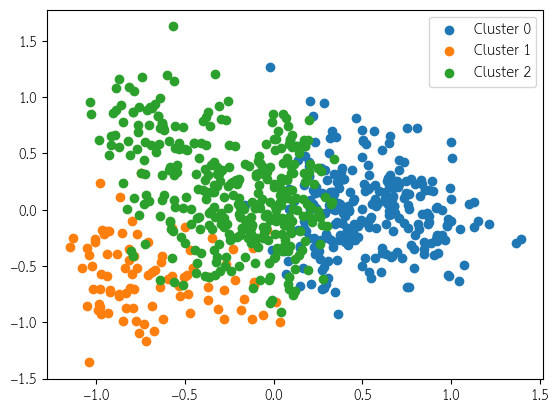

In [17]:
# assume you have a list of sentence embeddings in `embeddings_list`
# and a list of cluster labels in `cluster_labels`
embeddings_list = corpus_embeddings
# convert list to numpy array
embeddings_array = np.array(embeddings_list)

# reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings_array)

# define color map
cmap = cm.get_cmap('tab10')
colors = [cmap(i) for i in range(len(set(cluster_assignment)))]
# colors = ['red', 'blue', 'green', 'purple', 'orange', 'gray', 'black']

# plot the embeddings in a scatter plot, colored by cluster label
for i, label in enumerate(set(cluster_assignment)):
    indices = np.where(cluster_assignment == label)[0]
    plt.scatter(embeddings_2d[indices, 0], embeddings_2d[indices, 1], c=[colors[i]], label=f'Cluster {label}')

plt.legend()
plt.show()

## Word cloud

(-0.5, 3071.5, 2303.5, -0.5)

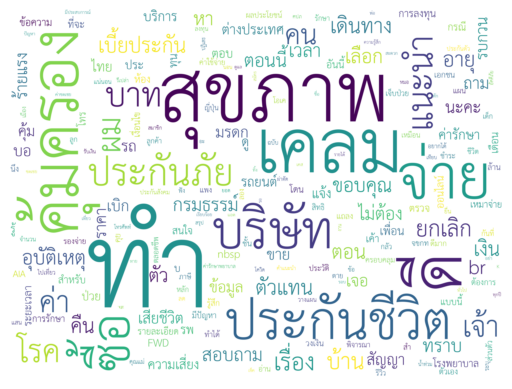

In [18]:
text = ' '.join(clustered_sentences_3[0])
text = ' '.join(word_tokenize(text, engine="newmm"))
stop_word_add = ["‡πÑ‡∏´‡∏°","‡πÑ‡∏î‡πâ","‡∏Å‡∏≤‡∏£","‡∏°‡∏µ","‡∏´‡∏£‡∏∑‡∏≠","‡∏ö‡πâ‡∏≤‡∏á","‡∏Ñ‡∏£‡∏±‡∏ö","‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô","‡∏Å‡∏£‡∏£‡∏°‡∏ò‡∏£‡∏£‡∏°‡πå","‡∏õ‡∏µ","‡πÄ‡∏ö‡∏µ‡πâ‡∏¢"]

wordcloud = WordCloud(font_path='thsarabunnew-webfont.ttf',
                      stopwords = list(common.thai_stopwords())+stop_word_add,
                      relative_scaling = 1.0,
                      min_font_size=4,
                      background_color="white",
                      width=1024,
                      height=768,
                      scale=3,
                      font_step=1,
                      collocations=False,
                      regexp=r"[\u0E00-\u0E7Fa-zA-Z']+",
                      margin=2
                      ).generate(text)
plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")

(-0.5, 3071.5, 2303.5, -0.5)

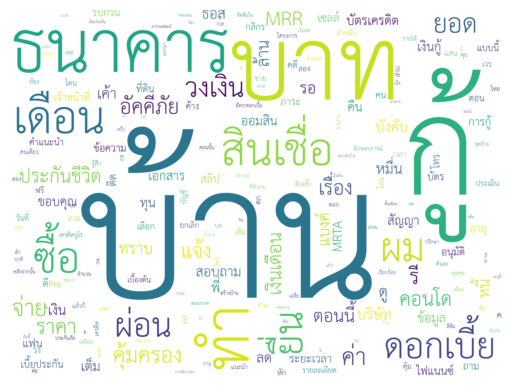

In [19]:
text = ' '.join(clustered_sentences_3[1])
text = ' '.join(word_tokenize(text, engine="newmm"))
stop_word_add = ["‡πÑ‡∏´‡∏°","‡πÑ‡∏î‡πâ","‡∏Å‡∏≤‡∏£","‡∏°‡∏µ","‡∏´‡∏£‡∏∑‡∏≠","‡∏ö‡πâ‡∏≤‡∏á","‡∏Ñ‡∏£‡∏±‡∏ö","‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô","‡∏Å‡∏£‡∏£‡∏°‡∏ò‡∏£‡∏£‡∏°‡πå","‡∏õ‡∏µ","‡πÄ‡∏ö‡∏µ‡πâ‡∏¢"]

wordcloud = WordCloud(font_path='thsarabunnew-webfont.ttf',
                      stopwords = list(common.thai_stopwords())+stop_word_add,
                      relative_scaling = 1.0,
                      min_font_size=4,
                      background_color="white",
                      width=1024,
                      height=768,
                      scale=3,
                      font_step=1,
                      collocations=False,
                      regexp=r"[\u0E00-\u0E7Fa-zA-Z']+",
                      margin=2
                      ).generate(text)
plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")

(-0.5, 3071.5, 2303.5, -0.5)

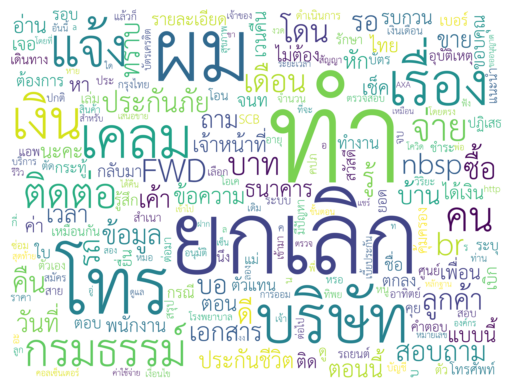

In [20]:
text = ' '.join(clustered_sentences_3[2])
text = ' '.join(word_tokenize(text, engine="newmm"))
stop_word_add = ["‡πÑ‡∏´‡∏°","‡πÑ‡∏î‡πâ","‡∏Å‡∏≤‡∏£","‡∏°‡∏µ","‡∏´‡∏£‡∏∑‡∏≠","‡∏ö‡πâ‡∏≤‡∏á","‡∏Ñ‡∏£‡∏±‡∏ö","‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô","‡∏Å‡∏£‡∏£‡∏°‡∏ò‡∏£‡∏£‡∏°‡πå","‡∏õ‡∏µ","‡πÄ‡∏ö‡∏µ‡πâ‡∏¢"]

wordcloud = WordCloud(font_path='thsarabunnew-webfont.ttf',
                      stopwords = list(common.thai_stopwords())+stop_word_add,
                      relative_scaling = 1.0,
                      min_font_size=4,
                      background_color="white",
                      width=1024,
                      height=768,
                      scale=3,
                      font_step=1,
                      collocations=False,
                      regexp=r"[\u0E00-\u0E7Fa-zA-Z']+",
                      margin=2
                      ).generate(text)
plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")

## Label

### Positive Text

In [21]:
def custom_token(text):
    # Your tokenization logic here
    tokens = custom_tokenizer.word_tokenize(text)
    return tokens

In [22]:
from google.colab import files
uploaded = files.upload()

Saving pos_word_latest.txt to pos_word_latest.txt


In [ ]:
with open('pos_word_latest.txt', 'r') as file:
  pos_txt = file.read()
print(pos_txt)

In [24]:
pos_txt

'‡∏£‡∏ß‡∏î‡πÄ‡∏£‡πá‡∏ß\n‡πÑ‡∏î‡πâ‡∏î‡∏µ\n‡πÑ‡∏°‡πà‡∏ú‡∏¥‡∏î‡∏´‡∏ß‡∏±‡∏á\n‡πÇ‡∏Ñ‡∏£‡∏ï‡∏î‡∏µ\n‡πÇ‡∏Ñ‡∏£‡∏ï‡∏´‡∏°‡∏≤‡∏∞\n‡πÑ‡∏°‡πà‡πÄ‡∏Ñ‡∏¢‡∏ú‡∏¥‡∏î‡∏´‡∏ß‡∏±‡∏á\n‡∏™‡∏ö‡∏≤‡∏¢\n‡∏™‡∏ô‡πÉ‡∏à\n‡∏Æ‡πà‡∏≤\n‡∏¢‡∏≠‡∏î‡πÄ‡∏¢‡∏µ‡πà‡∏¢‡∏°\nLove\n‡∏õ‡∏•‡∏∑‡πâ‡∏°‡∏õ‡∏£‡∏¥‡πà‡∏°\n‡∏ñ‡∏π‡∏Å‡πÉ‡∏à\n‡∏ß‡∏π‡πâ‡∏ß\n‡πÑ‡∏î‡πâ‡πÄ‡∏•‡∏¢\n‡∏™‡∏π‡πâ‡πÜ\n‡πÄ‡∏¢‡πâ‡πÜ\n‡∏Å‡∏•‡πâ‡∏≤\n‡πÄ‡∏ä‡∏µ‡πà‡∏¢‡∏ß‡∏ä‡∏≤‡∏ç\n‡πÄ‡∏î‡πà‡∏ô\n‡∏ö‡∏ß‡∏Å\n‡∏°‡∏±‡πà‡∏á‡∏Ñ‡∏±‡πà‡∏á\n‡∏°‡∏±‡πà‡∏á‡∏°‡∏µ\n‡∏£‡∏≠‡∏ö‡∏Ñ‡∏≠‡∏ö\n‡πÄ‡∏£‡πá‡∏ß\n‡∏•‡∏∞‡πÄ‡∏≠‡∏µ‡∏¢‡∏î\n‡∏•‡∏∞‡∏°‡∏∏‡∏ô\n‡∏•‡∏∞‡∏°‡∏∏‡∏ô‡∏•‡∏∞‡∏°‡πà‡∏≠‡∏°\n‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à\n‡∏™‡∏∏‡∏†‡∏≤‡∏û\n‡∏´‡∏ô‡∏∏‡πà‡∏°‡πÅ‡∏ô‡πà‡∏ô\n‡∏≠‡∏£‡πà‡∏≠‡∏¢\n‡πÉ‡∏´‡∏ç‡πà‡πÇ‡∏ï\n‡∏≠‡πà‡∏≠‡∏ô‡πÇ‡∏¢‡∏ô\n‡∏≠‡∏±‡∏®‡∏à‡∏£‡∏£‡∏¢‡πå\n‡πÄ‡∏Æ‡∏á\n‡∏î‡∏µ\n‡∏î‡∏µ‡πÉ‡∏à\n‡∏≠‡∏∏‡πà‡∏ô‡πÉ‡∏à\n‡πÄ‡∏Ç‡πâ‡∏≤‡∏ï‡∏≤\n‡πÄ‡∏Ç‡πâ‡∏≤‡∏ï‡∏≤‡∏Å‡∏£‡∏£‡∏°‡∏Å‡∏≤‡∏£\n‡∏£‡∏±‡∏Å\n‡∏ä‡∏≠‡∏ö\n‡∏á‡∏î‡∏á‡∏≤‡∏°\n‡∏Å‡∏ï‡πÄ‡∏ß‡∏ó‡∏µ\n‡∏Å‡∏ï‡∏±‡∏ç‡∏ç‡∏π\n‡πÅ‡∏Ç‡πá‡∏á‡πÅ‡∏Å‡∏£‡πà‡∏á\n‡πÅ‡∏Ç‡πá‡∏á‡∏Ç‡∏±‡∏ô\n‡πÅ‡∏Ç‡πá‡∏á‡πÅ‡∏£‡∏á\n‡∏Ñ‡∏£‡∏∑‡πâ

In [25]:
pos_list = pos_txt.splitlines()
pos_list = [pos.strip() for pos in pos_list]
pos_list = list(filter(bool, pos_list))
pos_list

['‡∏£‡∏ß‡∏î‡πÄ‡∏£‡πá‡∏ß',
 '‡πÑ‡∏î‡πâ‡∏î‡∏µ',
 '‡πÑ‡∏°‡πà‡∏ú‡∏¥‡∏î‡∏´‡∏ß‡∏±‡∏á',
 '‡πÇ‡∏Ñ‡∏£‡∏ï‡∏î‡∏µ',
 '‡πÇ‡∏Ñ‡∏£‡∏ï‡∏´‡∏°‡∏≤‡∏∞',
 '‡πÑ‡∏°‡πà‡πÄ‡∏Ñ‡∏¢‡∏ú‡∏¥‡∏î‡∏´‡∏ß‡∏±‡∏á',
 '‡∏™‡∏ö‡∏≤‡∏¢',
 '‡∏™‡∏ô‡πÉ‡∏à',
 '‡∏Æ‡πà‡∏≤',
 '‡∏¢‡∏≠‡∏î‡πÄ‡∏¢‡∏µ‡πà‡∏¢‡∏°',
 'Love',
 '‡∏õ‡∏•‡∏∑‡πâ‡∏°‡∏õ‡∏£‡∏¥‡πà‡∏°',
 '‡∏ñ‡∏π‡∏Å‡πÉ‡∏à',
 '‡∏ß‡∏π‡πâ‡∏ß',
 '‡πÑ‡∏î‡πâ‡πÄ‡∏•‡∏¢',
 '‡∏™‡∏π‡πâ‡πÜ',
 '‡πÄ‡∏¢‡πâ‡πÜ',
 '‡∏Å‡∏•‡πâ‡∏≤',
 '‡πÄ‡∏ä‡∏µ‡πà‡∏¢‡∏ß‡∏ä‡∏≤‡∏ç',
 '‡πÄ‡∏î‡πà‡∏ô',
 '‡∏ö‡∏ß‡∏Å',
 '‡∏°‡∏±‡πà‡∏á‡∏Ñ‡∏±‡πà‡∏á',
 '‡∏°‡∏±‡πà‡∏á‡∏°‡∏µ',
 '‡∏£‡∏≠‡∏ö‡∏Ñ‡∏≠‡∏ö',
 '‡πÄ‡∏£‡πá‡∏ß',
 '‡∏•‡∏∞‡πÄ‡∏≠‡∏µ‡∏¢‡∏î',
 '‡∏•‡∏∞‡∏°‡∏∏‡∏ô',
 '‡∏•‡∏∞‡∏°‡∏∏‡∏ô‡∏•‡∏∞‡∏°‡πà‡∏≠‡∏°',
 '‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à',
 '‡∏™‡∏∏‡∏†‡∏≤‡∏û',
 '‡∏´‡∏ô‡∏∏‡πà‡∏°‡πÅ‡∏ô‡πà‡∏ô',
 '‡∏≠‡∏£‡πà‡∏≠‡∏¢',
 '‡πÉ‡∏´‡∏ç‡πà‡πÇ‡∏ï',
 '‡∏≠‡πà‡∏≠‡∏ô‡πÇ‡∏¢‡∏ô',
 '‡∏≠‡∏±‡∏®‡∏à‡∏£‡∏£‡∏¢‡πå',
 '‡πÄ‡∏Æ‡∏á',
 '‡∏î‡∏µ',
 '‡∏î‡∏µ‡πÉ‡∏à',
 '‡∏≠‡∏∏‡πà‡∏ô‡πÉ‡∏à',
 '‡πÄ‡∏Ç‡πâ‡∏≤‡∏ï‡∏≤',
 '‡πÄ‡∏Ç‡πâ‡∏≤‡∏ï‡∏≤‡∏Å‡∏£‡∏£‡∏°‡∏Å‡∏≤‡∏£',
 '‡∏£‡∏±‡∏Å',
 '‡∏ä‡∏≠‡∏ö',
 '‡∏á‡∏î‡∏á‡∏≤‡∏

### Negative Text

In [26]:
from google.colab import files
uploaded = files.upload()

Saving neg_word_latest.txt to neg_word_latest.txt


In [ ]:
with open('neg_word_latest.txt', 'r') as file:
  neg_txt = file.read()
print(neg_txt)

In [28]:
neg_txt

'‡∏ó‡πâ‡∏≠‡πÅ‡∏ó‡πâ\n‡πÄ‡∏Ñ‡∏£‡∏µ‡∏¢‡∏î\n‡πÄ‡∏¢‡∏™‡πÄ‡πÄ‡∏°‡πà\n‡∏´‡∏î‡∏´‡∏π‡πà\n‡πÄ‡πÄ‡∏£‡∏á‡∏Å‡∏î‡∏î‡∏±‡∏ô\n‡∏≠‡∏¥‡πÄ‡∏ß‡∏ô‡∏ô\n‡∏£‡πâ‡∏≠‡∏á‡πÑ‡∏´‡πâ\n‡∏ö‡∏±‡πà‡∏ô‡∏ó‡∏≠‡∏ô\n‡πÉ‡∏à‡∏´‡∏°‡∏≤\n‡∏ä‡∏≤‡∏ï‡∏¥‡∏´‡∏°‡∏≤\n‡∏™‡∏±‡∏ô‡∏î‡∏≤‡∏ô‡∏´‡∏°‡∏≤\n‡∏õ‡∏≤‡∏Å‡∏´‡∏°‡∏≤\n‡∏£‡πâ‡∏≠‡∏á‡πÑ‡∏´‡πâ\n‡∏≠‡∏∂‡∏î‡∏≠‡∏±‡∏î\n‡∏£‡∏≥‡∏Ñ‡∏≤‡∏ç\n‡πÇ‡∏Ñ‡∏£‡∏ï\n‡∏≠‡∏¢‡πà‡∏≤\n‡∏´‡∏•‡∏≠‡∏Å‡∏•‡∏ß‡∏á\n‡∏ï‡πâ‡∏°‡∏ï‡∏∏‡πã‡∏ô\n‡∏õ‡∏•‡∏≠‡∏°\n‡∏ï‡∏≥‡∏´‡∏ô‡∏¥\n‡πÑ‡∏õ‡∏™‡∏ö‡∏≤‡∏¢‡πÄ‡πÄ‡∏•‡πâ‡∏ß\n‡πÑ‡∏°‡πà‡∏ä‡∏≠‡∏ö\n‡πÑ‡∏°‡πà‡∏î‡∏µ\n‡πÇ‡∏á‡πà‡πÄ‡∏á‡πà‡∏≤\nRIP\n‡∏ï‡∏µ‡∏ô\n‡∏≠‡∏¥‡∏î‡∏≠‡∏Å\n‡∏´‡∏ô‡πâ‡∏≤‡∏´‡∏°‡∏µ\n‡πÇ‡∏î‡∏ô‡∏´‡∏•‡∏≠‡∏Å\n‡∏´‡∏•‡∏≠‡∏Å‡∏•‡∏ß‡∏á\n‡∏™‡∏≤‡∏õ‡∏™‡πà‡∏á\n‡πÄ‡∏´‡∏°‡πá‡∏ô\n‡∏ö‡∏±‡∏î‡∏ã‡∏ö\n‡πÅ‡∏¢‡πà\n‡∏≠‡∏±‡∏ô‡∏ï‡∏£‡∏≤‡∏¢\n‡πÄ‡∏™‡∏µ‡∏¢‡∏ä‡∏µ‡∏ß‡∏¥‡∏ï\n‡∏Ñ‡∏ß‡∏≤‡∏°‡πÄ‡∏™‡∏µ‡∏¢‡πÉ‡∏à\n‡∏ï‡∏≤‡∏¢‡∏´‡πà‡∏≤\n‡πÅ‡∏Ç‡πá‡∏á‡∏Å‡∏£‡∏∞‡∏î‡πâ‡∏≤‡∏á\n‡∏ä‡∏∏‡πà‡∏¢\n‡∏´‡πà‡∏ß‡∏¢‡πÅ‡∏ï‡∏Å\n‡πÅ‡∏°‡πà‡πÄ‡∏¢‡∏™\n‡πÄ‡∏ü‡∏•\n‡πÄ‡∏¢‡∏™‡πÄ‡∏Ç‡πâ\n‡∏™‡∏ñ‡∏∏‡∏ô\n‡πÑ‡∏°‡πà‡∏ä‡∏≠‡∏ö\n‡∏õ‡∏ß‡∏î‡∏´‡∏±‡∏ß\n‡πÄ‡∏™‡∏µ‡∏¢‡∏´‡∏°‡∏≤\n‡πÄ‡

In [29]:
neg_list = neg_txt.splitlines()
neg_list = [neg.strip() for neg in neg_list]
neg_list = list(filter(bool, neg_list))
neg_list

['‡∏ó‡πâ‡∏≠‡πÅ‡∏ó‡πâ',
 '‡πÄ‡∏Ñ‡∏£‡∏µ‡∏¢‡∏î',
 '‡πÄ‡∏¢‡∏™‡πÄ‡πÄ‡∏°‡πà',
 '‡∏´‡∏î‡∏´‡∏π‡πà',
 '‡πÄ‡πÄ‡∏£‡∏á‡∏Å‡∏î‡∏î‡∏±‡∏ô',
 '‡∏≠‡∏¥‡πÄ‡∏ß‡∏ô‡∏ô',
 '‡∏£‡πâ‡∏≠‡∏á‡πÑ‡∏´‡πâ',
 '‡∏ö‡∏±‡πà‡∏ô‡∏ó‡∏≠‡∏ô',
 '‡πÉ‡∏à‡∏´‡∏°‡∏≤',
 '‡∏ä‡∏≤‡∏ï‡∏¥‡∏´‡∏°‡∏≤',
 '‡∏™‡∏±‡∏ô‡∏î‡∏≤‡∏ô‡∏´‡∏°‡∏≤',
 '‡∏õ‡∏≤‡∏Å‡∏´‡∏°‡∏≤',
 '‡∏£‡πâ‡∏≠‡∏á‡πÑ‡∏´‡πâ',
 '‡∏≠‡∏∂‡∏î‡∏≠‡∏±‡∏î',
 '‡∏£‡∏≥‡∏Ñ‡∏≤‡∏ç',
 '‡πÇ‡∏Ñ‡∏£‡∏ï',
 '‡∏≠‡∏¢‡πà‡∏≤',
 '‡∏´‡∏•‡∏≠‡∏Å‡∏•‡∏ß‡∏á',
 '‡∏ï‡πâ‡∏°‡∏ï‡∏∏‡πã‡∏ô',
 '‡∏õ‡∏•‡∏≠‡∏°',
 '‡∏ï‡∏≥‡∏´‡∏ô‡∏¥',
 '‡πÑ‡∏õ‡∏™‡∏ö‡∏≤‡∏¢‡πÄ‡πÄ‡∏•‡πâ‡∏ß',
 '‡πÑ‡∏°‡πà‡∏ä‡∏≠‡∏ö',
 '‡πÑ‡∏°‡πà‡∏î‡∏µ',
 '‡πÇ‡∏á‡πà‡πÄ‡∏á‡πà‡∏≤',
 'RIP',
 '‡∏ï‡∏µ‡∏ô',
 '‡∏≠‡∏¥‡∏î‡∏≠‡∏Å',
 '‡∏´‡∏ô‡πâ‡∏≤‡∏´‡∏°‡∏µ',
 '‡πÇ‡∏î‡∏ô‡∏´‡∏•‡∏≠‡∏Å',
 '‡∏´‡∏•‡∏≠‡∏Å‡∏•‡∏ß‡∏á',
 '‡∏™‡∏≤‡∏õ‡∏™‡πà‡∏á',
 '‡πÄ‡∏´‡∏°‡πá‡∏ô',
 '‡∏ö‡∏±‡∏î‡∏ã‡∏ö',
 '‡πÅ‡∏¢‡πà',
 '‡∏≠‡∏±‡∏ô‡∏ï‡∏£‡∏≤‡∏¢',
 '‡πÄ‡∏™‡∏µ‡∏¢‡∏ä‡∏µ‡∏ß‡∏¥‡∏ï',
 '‡∏Ñ‡∏ß‡∏≤‡∏°‡πÄ‡∏™‡∏µ‡∏¢‡πÉ‡∏à',
 '‡∏ï‡∏≤‡∏¢‡∏´‡πà‡∏≤',
 '‡πÅ‡∏Ç‡πá‡∏á‡∏Å‡∏£‡∏∞‡∏î‡πâ‡∏≤‡∏á',
 '‡∏ä‡∏∏‡πà‡∏¢',
 '‡∏´‡πà‡∏ß‡∏¢‡πÅ‡∏ï‡∏Å',
 '‡πÅ‡∏

### tokenize

In [30]:
words = set(thai_words())  # thai_words() returns frozenset
words.update(neg_list)
words.update(pos_list)
custom_tokenizer = Tokenizer(words)

In [34]:
df = df.copy()
df['tokens'] = df['text'].apply(custom_token)
df['tokens'] = df['tokens'].apply(lambda x: ' '.join(x))
df.sample(10)

text        source  \
107  ‡∏™‡∏¥‡∏ô‡∏°‚Ä¶.‡∏á ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏†‡∏±‡∏¢‡∏£‡∏ñ‡∏¢‡∏ô‡∏ï‡πå ‡∏£‡∏µ‡∏ß‡∏¥‡∏ß‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏†‡∏±‡∏¢‡∏ó...        pantip   
234                        ‡∏™‡∏á‡∏™‡∏±‡∏¢‡∏Å‡∏≤‡∏£‡πÅ‡∏ñ‡∏•‡∏á‡∏™‡∏∏‡∏Ç‡∏†‡∏≤‡∏û‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏Ñ‡πà‡∏∞        pantip   
506  ‡πÄ‡∏£‡∏≤‡∏Å‡∏π‡πâ‡∏ã‡∏∑‡πâ‡∏≠‡∏ö‡πâ‡∏≤‡∏ô‡πÉ‡∏ô‡∏£‡∏≤‡∏Ñ‡∏≤ 5 ‡∏•‡πâ‡∏≤‡∏ô ‡∏ö‡∏≤‡∏ó‡∏Ñ‡πà‡∏∞ ‡∏Å‡∏π‡πâ‡∏£‡πà‡∏ß‡∏°‡∏Å‡∏±‡∏ö‡πÅ...        pantip   
248                       ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏ã‡∏∑‡πâ‡∏≠‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏ä‡∏µ‡∏ß‡∏¥‡∏ï‡∏Ñ‡∏£‡∏±‡πâ‡∏á‡πÅ‡∏£‡∏Å        pantip   
631  <img class="img-in-post" src="https://f.ptcdn....  pantip (fwd)   
460  ‡∏û‡∏≠‡∏î‡∏µ‡πÄ‡∏£‡∏≤‡∏Å‡∏π‡πâ‡∏ö‡πâ‡∏≤‡∏ô‡∏Ñ‡∏≤‡∏∞‡∏Ç‡∏≠‡∏á ‡∏ò‡∏≠‡∏™ ‡πÉ‡∏ä‡πâ‡∏™‡∏ß‡∏±‡∏™‡∏î‡∏¥‡∏Å‡∏≤‡∏£‡∏Å‡∏π‡πâ‡∏Ñ‡πà‡∏∞ ‡∏Å‡∏≥...        pantip   
357               ‡∏à‡∏∞‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô ‡∏Ç‡∏≠‡∏á ‡∏ä‡∏±‡∏ö‡∏ö‡πå‡∏™‡∏≤‡∏°‡∏±‡∏Ñ‡∏Ñ‡∏µ ‡∏Ñ‡∏±‡∏ö        pantip   
141                                 ‡πÄ‡∏Ñ‡∏•‡∏°‡∏ó‡∏¥‡∏û‡∏¢‡∏∞‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏†‡∏±‡∏¢        pantip   
240  ‡πÑ‡∏ó‡∏¢‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏ä‡∏µ‡∏ß‡∏¥‡∏ï‡∏ó‡∏≥‡πÑ‡∏ß‡πâ‡πÅ‡∏ö‡∏ö15‡∏õ‡∏µ‡πÅ‡∏ö‡∏ö‡∏°‡∏µ‡∏õ‡∏±‡∏ô‡∏ú‡∏•‡∏à‡∏∞‡∏Ñ‡∏£‡∏ö‡∏Å‡∏≥‡∏´‡∏ô‡∏î...        pantip   
588  ‡∏î‡∏π‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà‡πÉ‡∏ô‡∏´‡∏ô‡∏±‡∏á‡∏™‡∏∑‡∏≠‡∏£‡∏±‡∏ö‡∏£‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡∏ä‡∏≥‡∏£‡∏∞‡πÄ‡∏ö‡∏µ‡πâ‡∏¢‡∏Ñ‡∏£‡∏±‡∏ö ‡∏´‡∏±‡∏ß‡∏à‡∏∞‡∏°...        pantip   

                                                tokens  
107  ‡∏™‡∏¥ ‡∏ô‡∏° ‚Ä¶.‡∏á   ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏†‡∏±‡∏¢ ‡∏£‡∏ñ‡∏¢‡∏ô‡∏ï‡πå   ‡∏£‡∏µ‡∏ß‡∏¥‡∏ß ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô   ...  
234                    ‡∏™‡∏á‡∏™‡∏±‡∏¢ ‡∏Å‡∏≤‡∏£‡πÅ‡∏ñ‡∏•‡∏á ‡∏™‡∏∏‡∏Ç‡∏†‡∏≤‡∏û ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô ‡∏Ñ‡πà‡∏∞  
506  ‡πÄ‡∏£‡∏≤ ‡∏Å‡∏π‡πâ ‡∏ã‡∏∑‡πâ‡∏≠ ‡∏ö‡πâ‡∏≤‡∏ô ‡πÉ‡∏ô ‡∏£‡∏≤‡∏Ñ‡∏≤   5   ‡∏•‡πâ‡∏≤‡∏ô   ‡∏ö‡∏≤‡∏ó ‡∏Ñ‡πà‡∏∞...  
248                    ‡πÄ‡∏£‡∏¥‡πà‡∏° ‡∏ã‡∏∑‡πâ‡∏≠ ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏ä‡∏µ‡∏ß‡∏¥‡∏ï ‡∏Ñ‡∏£‡∏±‡πâ‡∏á‡πÅ‡∏£‡∏Å  
631  < img   class =" img-in-post "   src =" https ...  
460  ‡∏û‡∏≠‡∏î‡∏µ ‡πÄ‡∏£‡∏≤ ‡∏Å‡∏π‡πâ ‡∏ö‡πâ‡∏≤‡∏ô ‡∏Ñ‡∏≤ ‡∏∞ ‡∏Ç‡∏≠‡∏á   ‡∏ò‡∏≠‡∏™   ‡πÉ‡∏ä‡πâ ‡∏™‡∏ß‡∏±‡∏™‡∏î‡∏¥ ...  
357     ‡∏à‡∏∞ ‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å   ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô   ‡∏Ç‡∏≠‡∏á   ‡∏ä‡∏±‡∏ö‡∏ö‡πå ‡∏™‡∏≤‡∏°‡∏±‡∏Ñ‡∏Ñ‡∏µ   ‡∏Ñ‡∏±‡∏ö  
141                              ‡πÄ‡∏Ñ‡∏•‡∏° ‡∏ó‡∏¥‡∏û ‡∏¢‡∏∞ ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏†‡∏±‡∏¢  
240  ‡πÑ‡∏ó‡∏¢ ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏ä‡∏µ‡∏ß‡∏¥‡∏ï ‡∏ó‡∏≥ ‡πÑ‡∏ß‡πâ ‡πÅ‡∏ö‡∏ö 15 ‡∏õ‡∏µ ‡πÅ‡∏ö‡∏ö ‡∏°‡∏µ ‡∏õ‡∏±‡∏ô‡∏ú‡∏• ...  
588  ‡∏î‡∏π ‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà ‡πÉ‡∏ô ‡∏´‡∏ô‡∏±‡∏á‡∏™‡∏∑‡∏≠‡∏£‡∏±‡∏ö‡∏£‡∏≠‡∏á ‡∏Å‡∏≤‡∏£ ‡∏ä‡∏≥‡∏£‡∏∞ ‡πÄ‡∏ö‡∏µ‡πâ‡∏¢ ‡∏Ñ‡∏£‡∏±‡∏ö...

In [35]:
pattern = '|'.join(neg_list)
result = df[df['text'].str.contains(pattern, regex=True, flags=re.IGNORECASE)]
result.sample(10)

text  source  \
142  ‡πÅ‡∏à‡πâ‡∏á‡πÄ‡∏Ñ‡∏•‡∏°‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà9 ‡∏ò.‡∏Ñ.65‡∏ß‡∏±‡∏ô‡∏ô‡∏µ‡πâ 13 ‡∏°‡∏Ñ.66 (‡πÉ‡∏ô‡πÅ‡∏ö‡∏ö‡∏ü‡∏≠...  pantip   
309  ‡∏™‡∏∑‡∏ö‡πÄ‡∏ô‡∏∑‡πà‡∏≠‡∏á‡∏à‡∏≤‡∏Å‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô TQM ‡πÇ‡∏ó‡∏£‡∏°‡∏≤‡∏ó‡∏∏‡∏Å‡∏ß‡∏±‡∏ô‡∏Ñ‡πà‡∏∞ ‡πÄ‡∏£‡∏≤‡∏Å‡πá‡∏£‡∏±‡∏ö...  pantip   
697  ,‡πÄ‡∏£‡∏≤‡∏ã‡∏∑‡πâ‡∏≠‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏™‡∏∏‡∏Ç‡∏†‡∏≤‡∏û‡πÄ‡∏à‡πâ‡∏≤‡∏ô‡∏µ‡πâ‡∏≠‡∏¢‡∏π‡πà‡∏ä‡∏∑‡πà‡∏≠‡∏ã‡∏±‡∏ô‡πÄ‡∏î‡∏¢‡πå‡∏•‡πà‡∏≤‡∏™...  pantip   
562  ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏Ñ‡∏¥‡∏î‡πÄ‡∏´‡πá‡∏ô‡∏ô‡∏µ‡πâ‡∏ñ‡∏π‡∏Å‡∏•‡∏ö‡πÄ‡∏ô‡∏∑‡πà‡∏≠‡∏á‡∏à‡∏≤‡∏Å ‡∏°‡∏µ‡πÄ‡∏ô‡∏∑‡πâ‡∏≠‡∏´‡∏≤‡πÄ‡∏™‡∏ô‡∏≠‡∏ã‡∏∑‡πâ‡∏≠...  pantip   
469                      ‡∏¢‡∏∑‡πà‡∏ô‡∏Å‡∏π‡πâ‡∏ö‡πâ‡∏≤‡∏ô ‡∏ò‡∏≠‡∏™. ‡∏à‡∏∞‡∏ú‡πà‡∏≤‡∏ô‡πÑ‡∏´‡∏°‡∏ô‡πâ‡∏≠  pantip   
359  ‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å‡∏Å‡∏≤‡∏£‡∏™‡πà‡∏á‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏ä‡∏µ‡∏ß‡∏¥‡∏ï‡∏´‡∏£‡∏∑‡∏≠‡πÄ‡∏ß‡∏£‡∏Ñ‡∏∑‡∏ô ‡∏Ç‡∏≠‡∏á A...  pantip   
156  ‡∏ú‡∏°‡∏à‡∏∞‡∏ó‡∏≥‡∏Å‡∏≤‡∏£‡∏£‡∏µ‡πÑ‡∏ü‡πÅ‡∏ô‡∏ô‡∏ã‡πå‡∏ö‡πâ‡∏≤‡∏ô ‡∏ó‡∏µ‡∏ô‡∏µ‡πâ‡∏ï‡∏±‡∏ß‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏≠‡∏±‡∏Ñ‡∏Ñ‡∏µ‡∏†‡∏±‡∏¢‡∏ú...  pantip   
384        ‡πÉ‡∏Ñ‡∏£‡πÄ‡∏Ñ‡∏¢‡πÄ‡∏Ñ‡∏•‡∏°‡∏Ñ‡πà‡∏≤‡∏Ñ‡∏•‡∏≠‡∏î‡∏ö‡∏∏‡∏ï‡∏£‡∏Å‡∏±‡∏ö‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô LMG ‡∏ö‡πâ‡∏≤‡∏á‡∏Ñ‡∏£‡∏±‡∏ö  pantip   
458  ‡πÅ‡∏ä‡∏£‡πå‡∏õ‡∏£‡∏∞‡∏™‡∏ö‡∏Å‡∏≤‡∏£‡∏ì‡πå‡∏Ñ‡πà‡∏∞‡πÄ‡∏ô‡∏∑‡πà‡∏≠‡∏á‡∏î‡πâ‡∏ß‡∏¢‡πÄ‡∏£‡∏≤‡πÑ‡∏î‡πâ‡∏Å‡∏π‡πâ‡∏ö‡πâ‡∏≤‡∏ô‡∏´‡∏•‡∏±‡∏á‡πÅ‡∏£...  pantip   
165  ‡πÄ‡∏£‡∏≤‡∏ó‡∏≥‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏†‡∏±‡∏¢‡∏ô‡πâ‡∏≥‡∏ó‡πà‡∏ß‡∏°‡∏ö‡πâ‡∏≤‡∏ô‡πÄ‡∏õ‡∏µ‡πà‡∏¢‡∏°‡∏™‡∏∏‡∏Ç ‡∏Å‡∏±‡∏ö‡∏ö‡∏£‡∏¥‡∏©‡∏±‡∏ó‡∏ß‡∏¥...  pantip   

                                                tokens  
142  ‡πÅ‡∏à‡πâ‡∏á ‡πÄ‡∏Ñ‡∏•‡∏° ‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà 9   ‡∏ò.‡∏Ñ. 65 ‡∏ß‡∏±‡∏ô‡∏ô‡∏µ‡πâ   13   ‡∏°‡∏Ñ....  
309  ‡∏™‡∏∑‡∏ö ‡πÄ‡∏ô‡∏∑‡πà‡∏≠‡∏á‡∏à‡∏≤‡∏Å ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô   TQM   ‡πÇ‡∏ó‡∏£ ‡∏°‡∏≤ ‡∏ó‡∏∏‡∏Å‡∏ß‡∏±‡∏ô ‡∏Ñ‡πà‡∏∞...  
697  , ‡πÄ‡∏£‡∏≤ ‡∏ã‡∏∑‡πâ‡∏≠ ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô ‡∏™‡∏∏‡∏Ç‡∏†‡∏≤‡∏û ‡πÄ‡∏à‡πâ‡∏≤ ‡∏ô‡∏µ‡πâ ‡∏≠‡∏¢‡∏π‡πà ‡∏ä‡∏∑‡πà‡∏≠ ‡∏ã‡∏±...  
562  ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏Ñ‡∏¥‡∏î‡πÄ‡∏´‡πá‡∏ô ‡∏ô‡∏µ‡πâ ‡∏ñ‡∏π ‡∏Å‡∏•‡∏ö ‡πÄ‡∏ô‡∏∑‡πà‡∏≠‡∏á‡∏à‡∏≤‡∏Å   ‡∏°‡∏µ ‡πÄ‡∏ô‡∏∑‡πâ‡∏≠‡∏´‡∏≤ ...  
469             ‡∏¢‡∏∑‡πà‡∏ô ‡∏Å‡∏π‡πâ ‡∏ö‡πâ‡∏≤‡∏ô   ‡∏ò‡∏≠‡∏™.   ‡∏à‡∏∞ ‡∏ú‡πà‡∏≤‡∏ô ‡πÑ‡∏´‡∏° ‡∏ô‡πâ‡∏≠  
359  ‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£ ‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å ‡∏Å‡∏≤‡∏£ ‡∏™‡πà‡∏á ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏ä‡∏µ‡∏ß‡∏¥‡∏ï ‡∏´‡∏£‡∏∑‡∏≠ ‡πÄ‡∏ß‡∏£ ‡∏Ñ‡∏∑...  
156  ‡∏ú‡∏° ‡∏à‡∏∞ ‡∏ó‡∏≥‡∏Å‡∏≤‡∏£ ‡∏£‡∏µ ‡πÑ‡∏ü‡πÅ‡∏ô‡∏ô‡∏ã‡πå ‡∏ö‡πâ‡∏≤‡∏ô   ‡∏ó‡∏µ‡∏ô‡∏µ‡πâ ‡∏ï‡∏±‡∏ß‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô ...  
384  ‡πÉ‡∏Ñ‡∏£ ‡πÄ‡∏Ñ‡∏¢ ‡πÄ‡∏Ñ‡∏•‡∏° ‡∏Ñ‡πà‡∏≤ ‡∏Ñ‡∏•‡∏≠‡∏î ‡∏ö‡∏∏‡∏ï‡∏£ ‡∏Å‡∏±‡∏ö ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô   LMG   ...  
458  ‡πÅ‡∏ä‡∏£‡πå ‡∏õ‡∏£‡∏∞‡∏™‡∏ö‡∏Å‡∏≤‡∏£‡∏ì‡πå ‡∏Ñ‡πà‡∏∞ ‡πÄ‡∏ô‡∏∑‡πà‡∏≠‡∏á‡∏î‡πâ‡∏ß‡∏¢ ‡πÄ‡∏£‡∏≤ ‡πÑ‡∏î‡πâ ‡∏Å‡∏π‡πâ ‡∏ö‡πâ‡∏≤...  
165  ‡πÄ‡∏£‡∏≤ ‡∏ó‡∏≥ ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏†‡∏±‡∏¢ ‡∏ô‡πâ‡∏≥‡∏ó‡πà‡∏ß‡∏° ‡∏ö‡πâ‡∏≤‡∏ô ‡πÄ‡∏õ‡∏µ‡πà‡∏¢‡∏° ‡∏™‡∏∏‡∏Ç   ‡∏Å‡∏±‡∏ö...

In [36]:
# Function to check if any toxic word is contained in the tokens
def check_toxic_words(tokens):
    return [word for word in tokens.split() if word in neg_list]
def count_toxic_words(tokens):
    count = sum([1 for word in tokens.split() if word in neg_list])
    return count

def check_pos_words(tokens):
    return [word for word in tokens.split() if word in pos_list]
def count_pos_words(tokens):
    count = sum([1 for word in tokens.split() if word in pos_list])
    return count

# check for toxic words
df['ToxicWordCount'] = df['tokens'].apply(count_toxic_words)
df['ToxicWords'] = df['tokens'].apply(check_toxic_words)
# check for positive words
df['PosWordCount'] = df['tokens'].apply(count_pos_words)
df['PosWords'] = df['tokens'].apply(check_pos_words)

df.sample(5)

text  source  \
409  ‡∏´‡∏≤‡∏ã‡∏∑‡πâ‡∏≠‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ôAIA‡∏Å‡∏±‡∏ö‡πÄ‡∏°‡∏∑‡∏≠‡∏á‡πÑ‡∏ó‡∏¢‡πÉ‡∏Ñ‡∏£‡πÄ‡∏õ‡πá‡∏ô‡∏ï‡∏±‡∏ß‡πÅ‡∏ó‡∏ô‡∏ó‡∏±‡∏Å‡∏°‡∏≤‡πÉ‡∏´...  pantip   
306  ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏à‡∏∞‡∏ï‡πà‡∏≠‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏£‡∏ñ‡∏¢‡∏ô‡∏ï‡πå‡∏•‡∏≠‡∏á‡∏ñ‡∏≤‡∏°‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏≠‡∏≠‡∏ô‡πÑ‡∏•‡∏ô‡πå‡πÄ‡∏à‡πâ‡∏≤‡∏ï...  pantip   
419  ‡∏≠‡∏¢‡∏≤‡∏Å‡πÑ‡∏î‡πâ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ôIPD‡πÅ‡∏ö‡∏ö‡πÑ‡∏°‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏™‡∏≥‡∏£‡∏≠‡∏á‡∏à‡πà‡∏≤‡∏¢‡∏£‡∏≤‡∏Ñ‡∏≤‡πÑ‡∏°‡πà‡πÄ‡∏Å‡∏¥‡∏ô...  pantip   
302  ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏™‡∏∏‡∏Ç‡∏†‡∏≤‡∏û‡∏ï‡∏±‡∏ß‡πÑ‡∏´‡∏ô‡∏î‡∏µ  ‡∏ï‡∏±‡πâ‡∏á‡∏á‡∏ö‡πÑ‡∏°‡πà‡πÄ‡∏Å‡∏¥‡∏ô‡∏õ‡∏µ‡∏•‡∏∞ 24000 ‡∏ö‡∏≤‡∏ó  pantip   
125                 ‡πÄ‡∏Ñ‡∏•‡∏°‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏ö‡πâ‡∏≤‡∏ô‡∏ô‡πâ‡∏≥‡∏ó‡πà‡∏ß‡∏°‡∏ó‡∏¥‡∏û‡∏¢‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏†‡∏±‡∏¢  pantip   

                                                tokens  ToxicWordCount  \
409  ‡∏´‡∏≤ ‡∏ã‡∏∑‡πâ‡∏≠ ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô AIA ‡∏Å‡∏±‡∏ö ‡πÄ‡∏°‡∏∑‡∏≠‡∏á ‡πÑ‡∏ó‡∏¢ ‡πÉ‡∏Ñ‡∏£ ‡πÄ‡∏õ‡πá‡∏ô‡∏ï‡∏±‡∏ß‡πÅ‡∏ó...               0   
306  ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏à‡∏∞ ‡∏ï‡πà‡∏≠ ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô ‡∏£‡∏ñ‡∏¢‡∏ô‡∏ï‡πå ‡∏•‡∏≠‡∏á ‡∏ñ‡∏≤‡∏° ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô ‡∏≠‡∏≠‡∏ô‡πÑ‡∏•...               1   
419  ‡∏≠‡∏¢‡∏≤‡∏Å‡πÑ‡∏î‡πâ ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô IPD ‡πÅ‡∏ö‡∏ö ‡πÑ‡∏°‡πà‡∏ï‡πâ‡∏≠‡∏á ‡∏™‡∏≥ ‡∏£‡∏≠‡∏á‡∏à‡πà‡∏≤‡∏¢ ‡∏£‡∏≤‡∏Ñ‡∏≤...               0   
302  ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô ‡∏™‡∏∏‡∏Ç‡∏†‡∏≤‡∏û ‡∏ï‡∏±‡∏ß ‡πÑ‡∏´‡∏ô ‡∏î‡∏µ    ‡∏ï‡∏±‡πâ‡∏á ‡∏á‡∏ö ‡πÑ‡∏°‡πà ‡πÄ‡∏Å‡∏¥‡∏ô ‡∏õ...               0   
125            ‡πÄ‡∏Ñ‡∏•‡∏° ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô ‡∏ö‡πâ‡∏≤‡∏ô ‡∏ô‡πâ‡∏≥‡∏ó‡πà‡∏ß‡∏° ‡∏ó‡∏¥‡∏û‡∏¢ ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏†‡∏±‡∏¢               0   

    ToxicWords  PosWordCount PosWords  
409         []             0       []  
306      [‡πÇ‡∏Å‡∏á]             0       []  
419         []             0       []  
302         []             1     [‡∏î‡∏µ]  
125         []             0       []

In [65]:
df['label_token'] = np.select(
    [(df['ToxicWordCount'] > 0),
     (df['PosWordCount'] > 0) & (df['ToxicWordCount'] == 0)],
    ['neg', 'pos'], default='neu')

df.sample(10)

text        source  \
130  ‡∏Ñ‡∏∑‡∏≠‡∏≠‡∏¢‡∏≤‡∏Å‡∏ñ‡∏≤‡∏°‡∏ú‡∏π‡πâ‡∏°‡∏µ‡∏õ‡∏£‡∏∞‡∏™‡∏ö‡∏Å‡∏≤‡∏£‡∏ì‡πå‡∏ß‡πà‡∏≤ ‡∏°‡∏µ‡πÉ‡∏Ñ‡∏£‡∏ó‡∏µ‡πà‡∏¢‡∏∑‡πà‡∏ô‡πÅ‡∏•‡πâ‡∏ß ...        pantip   
215  ‡πÄ‡∏£‡∏≤‡πÄ‡∏û‡∏¥‡πà‡∏á‡∏ó‡∏≥ ilink (unit linked) ‡∏Ç‡∏≠‡∏á axa ‡πÑ‡∏õ‡πÑ‡∏î‡πâ 6...        pantip   
353  ‡πÄ‡∏ï‡∏∑‡∏≠‡∏ô‡∏†‡∏±‡∏¢ ! ‡πÉ‡∏Ñ‡∏£‡∏Ñ‡∏¥‡∏î‡∏à‡∏∞‡∏ó‡∏≥‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô ‡∏ß‡∏¥‡∏£‡∏¥‡∏¢‡∏∞ By bdmh ‡∏ï‡πâ‡∏≠...        pantip   
518                ‡∏™‡∏¥‡∏ô‡πÄ‡∏ä‡∏∑‡πà‡∏≠‡∏ã‡πà‡∏≠‡∏°‡πÅ‡∏ã‡∏°‡∏ö‡πâ‡∏≤‡∏ô‡∏ö‡∏ô‡∏ó‡∏µ‡πà‡∏î‡∏¥‡∏ô‡∏£‡∏≤‡∏ä‡∏û‡∏±‡∏™‡∏î‡∏∏        pantip   
663  ‡∏ó‡∏±‡∏Å‡∏´‡∏•‡∏±‡∏á‡πÑ‡∏°‡∏Ñ‡πå‚Äã‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢‚Äã ‡∏≠‡πà‡∏≠‚Äã ‡∏ö‡πà‡∏≤‡∏¢‡πÄ‡∏Ç‡πâ‡∏≤‡πÑ‡∏õ‡∏™‡∏∞‡∏™‡∏°‡πÄ‡∏û‡∏¥‡πà...  pantip (fwd)   
15   ‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏Å‡∏≤‡∏£‡πÄ‡∏î‡∏¥‡∏ô‡∏ó‡∏≤‡∏á‡∏ï‡πà‡∏≤‡∏á‡∏õ‡∏£‡∏∞‡πÄ‡∏ó‡∏® ‡∏Ñ‡∏∑‡∏≠‡∏ñ‡πâ‡∏≤‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏Ç‡∏≠...        pantip   
551  ‡∏ï‡∏≠‡∏ô‡∏ô‡πÄ‡∏£‡∏≤‡∏ô‡∏≠‡∏¢‡∏°‡∏≤‡∏Å ‡πÅ‡∏ü‡∏ô‡πÄ‡∏£‡∏≤‡πÄ‡∏Ñ‡πâ‡∏≤‡∏°‡∏µ‡∏Ñ‡∏ô‡∏≠‡∏∑‡πà‡∏ô‡πÅ‡∏ï‡πà‡πÄ‡∏Ñ‡πâ‡∏≤‡∏ö‡∏≠‡∏Å‡∏ß‡πà‡∏≤‡πÄ...        pantip   
18   ‡∏°‡∏µ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô AXA ‡∏≠‡∏¢‡∏π‡πà‡πÅ‡∏•‡πâ‡∏ß ‡πÑ‡∏õ‡∏ï‡πà‡∏≤‡∏á‡∏õ‡∏£‡∏∞‡πÄ‡∏ó‡∏®‡∏ï‡πâ‡∏≠‡∏á‡∏ã‡∏∑‡πâ‡∏≠‡πÄ‡∏û‡∏¥‡πà...        pantip   
7    ‡∏ï‡∏≠‡∏ô‡πÅ‡∏£‡∏Å‡∏°‡∏µ‡πÄ‡∏ö‡∏≠‡∏£‡πå‡πÅ‡∏õ‡∏•‡∏Å‡πÇ‡∏ó‡∏£‡∏´‡∏≤‡∏ú‡∏° ‡πÅ‡∏ï‡πà Whocall ‡πÑ‡∏°‡πà‡πÅ‡∏à‡πâ‡∏á‡∏ß‡πà...        pantip   
344                  ‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏ö‡∏£‡∏¥‡∏©‡∏±‡∏ó chubb ‡∏¢‡∏≤‡∏Å‡∏°‡∏≤‡∏Å !        pantip   

                                                tokens  ToxicWordCount  \
130  ‡∏Ñ‡∏∑‡∏≠ ‡∏≠‡∏¢‡∏≤‡∏Å ‡∏ñ‡∏≤‡∏° ‡∏ú‡∏π‡πâ ‡∏°‡∏µ‡∏õ‡∏£‡∏∞‡∏™‡∏ö‡∏Å‡∏≤‡∏£‡∏ì‡πå ‡∏ß‡πà‡∏≤   ‡∏°‡∏µ ‡πÉ‡∏Ñ‡∏£ ‡∏ó‡∏µ‡πà...               0   
215  ‡πÄ‡∏£‡∏≤ ‡πÄ‡∏û‡∏¥‡πà‡∏á ‡∏ó‡∏≥   ilink   ( unit   linked )   ‡∏Ç‡∏≠‡∏á...               0   
353  ‡πÄ‡∏ï‡∏∑‡∏≠‡∏ô‡∏†‡∏±‡∏¢   !   ‡πÉ‡∏Ñ‡∏£ ‡∏Ñ‡∏¥‡∏î ‡∏à‡∏∞ ‡∏ó‡∏≥ ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô   ‡∏ß‡∏¥‡∏£‡∏¥‡∏¢‡∏∞  ...               0   
518          ‡∏™‡∏¥‡∏ô‡πÄ‡∏ä‡∏∑‡πà‡∏≠ ‡∏ã‡πà‡∏≠‡∏°‡πÅ‡∏ã‡∏° ‡∏ö‡πâ‡∏≤‡∏ô ‡∏ö‡∏ô ‡∏ó‡∏µ‡πà‡∏î‡∏¥‡∏ô ‡∏£‡∏≤‡∏ä ‡∏û‡∏±‡∏™‡∏î‡∏∏               0   
663  ‡∏ó‡∏±‡∏Å ‡∏´‡∏•‡∏±‡∏á ‡πÑ‡∏°‡∏Ñ‡πå ‚Äã ‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢ ‚Äã   ‡∏≠‡πà‡∏≠‚Äã   ‡∏ö‡πà‡∏≤‡∏¢ ‡πÄ‡∏Ç‡πâ‡∏≤...               3   
15   ‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô ‡∏Å‡∏≤‡∏£ ‡πÄ‡∏î‡∏¥‡∏ô‡∏ó‡∏≤‡∏á ‡∏ï‡πà‡∏≤‡∏á‡∏õ‡∏£‡∏∞‡πÄ‡∏ó‡∏®   ‡∏Ñ‡∏∑‡∏≠ ‡∏ñ‡πâ‡∏≤...               0   
551  ‡∏ï‡∏≠‡∏ô ‡∏ô ‡πÄ‡∏£‡∏≤ ‡∏ô‡∏≠ ‡∏¢ ‡∏°‡∏≤‡∏Å   ‡πÅ‡∏ü‡∏ô ‡πÄ‡∏£‡∏≤ ‡πÄ‡∏Ñ‡πâ‡∏≤ ‡∏°‡∏µ ‡∏Ñ‡∏ô‡∏≠‡∏∑‡πà‡∏ô ‡πÅ‡∏ï...               0   
18   ‡∏°‡∏µ ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô   AXA   ‡∏≠‡∏¢‡∏π‡πà‡πÅ‡∏•‡πâ‡∏ß   ‡πÑ‡∏õ ‡∏ï‡πà‡∏≤‡∏á‡∏õ‡∏£‡∏∞‡πÄ‡∏ó‡∏® ‡∏ï‡πâ‡∏≠...               0   
7    ‡∏ï‡∏≠‡∏ô‡πÅ‡∏£‡∏Å ‡∏°‡∏µ ‡πÄ‡∏ö‡∏≠‡∏£‡πå ‡πÅ‡∏õ‡∏•‡∏Å ‡πÇ‡∏ó‡∏£ ‡∏´‡∏≤ ‡∏ú‡∏°   ‡πÅ‡∏ï‡πà   Whocall...               0   
344         ‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô ‡∏ö‡∏£‡∏¥‡∏©‡∏±‡∏ó   chubb   ‡∏¢‡∏≤‡∏Å ‡∏°‡∏≤‡∏Å   !               0   

           ToxicWords  PosWordCount  PosWords label_token  
130                []             0        []         neu  
215                []             0        []         neu  
353                []             0        []         neu  
518                []             0        []         neu  
663  [‡πÇ‡∏Å‡∏á, ‡∏≠‡∏¢‡πà‡∏≤, ‡πÇ‡∏Å‡∏á]             0        []         neg  
15                 []             0        []         neu  
551                []             1     [‡∏ä‡∏≠‡∏ö]         pos  
18                 []             0        []         neu  
7                  []             1  [‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à]         pos  
344                []             0        []         neu

In [68]:
df[df['label_token'] == 'pos'].sample(5)

text        source  \
643                                       ‡∏ä‡∏≠‡∏ö‡∏û‡∏π‡∏î‡πÑ‡∏°‡πà‡∏Ñ‡∏£‡∏ö  pantip (fwd)   
64   ‡∏£‡∏ö‡∏Å‡∏ß‡∏ô‡∏™‡∏≠‡∏ö‡∏ñ‡∏≤‡∏°‡∏Ñ‡πà‡∏∞‡∏ï‡∏≠‡∏ô‡∏ô‡∏µ‡πâ‡πÄ‡∏ß‡∏•‡∏≤‡πÑ‡∏õ‡πÄ‡∏Å‡∏≤‡∏´‡∏•‡∏µ‡πÄ‡∏£‡∏≤‡∏ï‡πâ‡∏≠‡∏á‡∏ó‡∏≥‡∏õ‡∏£‡∏∞‡∏Å‡∏±...        pantip   
490  ‡∏£‡∏≤‡∏¢‡∏•‡∏∞‡πÄ‡∏≠‡∏µ‡∏¢‡∏î‡∏Ç‡∏≠‡∏á‡∏ú‡∏°‡∏Ñ‡∏∑‡∏≠ ‡πÄ‡∏á‡∏¥‡∏ô‡∏ú‡∏°‡∏ó‡∏µ‡πà‡πÑ‡∏î‡πâ‡∏à‡∏≤‡∏Å‡∏Å‡∏≤‡∏£‡∏Ç‡∏≤‡∏¢‡∏Ç‡∏≠‡∏á‡πÄ‡∏ô‡∏µ...        pantip   
323  ‡∏°‡∏≤‡πÅ‡∏ö‡∏ö‡πÄ‡∏î‡∏µ‡∏¢‡∏ß‡∏Å‡∏±‡∏ö 9 ‡∏™‡∏¥‡∏á‡∏´‡πå‡πÇ‡∏ö‡∏£‡∏Ñ‡πÄ‡∏Å‡∏≠‡∏£‡πå ‡πÄ‡∏•‡∏¢ ‡∏Ñ‡∏≥‡∏û‡∏π‡∏î‡πÄ‡∏î‡∏µ‡∏¢‡∏ß‡∏Å...        pantip   
244                         ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏ä‡∏µ‡∏ß‡∏¥‡∏ï‡∏ö‡∏£‡∏¥‡∏©‡∏±‡∏ó‡πÑ‡∏´‡∏ô‡∏î‡∏µ‡∏Ñ‡∏£‡∏±‡∏ö        pantip   

                                                tokens  ToxicWordCount  \
643                                    ‡∏ä‡∏≠‡∏ö ‡∏û‡∏π‡∏î ‡πÑ‡∏°‡πà ‡∏Ñ‡∏£‡∏ö               0   
64   ‡∏£‡∏ö‡∏Å‡∏ß‡∏ô ‡∏™‡∏≠‡∏ö‡∏ñ‡∏≤‡∏° ‡∏Ñ‡πà‡∏∞ ‡∏ï‡∏≠‡∏ô‡∏ô‡∏µ‡πâ ‡πÄ‡∏ß‡∏•‡∏≤ ‡πÑ‡∏õ ‡πÄ‡∏Å‡∏≤‡∏´‡∏•‡∏µ ‡πÄ‡∏£‡∏≤ ‡∏ï‡πâ‡∏≠...               0   
490  ‡∏£‡∏≤‡∏¢‡∏•‡∏∞‡πÄ‡∏≠‡∏µ‡∏¢‡∏î ‡∏Ç‡∏≠‡∏á ‡∏ú‡∏° ‡∏Ñ‡∏∑‡∏≠   ‡πÄ‡∏á‡∏¥‡∏ô ‡∏ú‡∏° ‡∏ó‡∏µ‡πà ‡πÑ‡∏î‡πâ ‡∏à‡∏≤‡∏Å ‡∏Å‡∏≤...               0   
323  ‡∏°‡∏≤ ‡πÅ‡∏ö‡∏ö ‡πÄ‡∏î‡∏µ‡∏¢‡∏ß ‡∏Å‡∏±‡∏ö   9   ‡∏™‡∏¥‡∏á‡∏´‡πå ‡πÇ‡∏ö ‡∏£‡∏Ñ‡πÄ‡∏Å‡∏≠‡∏£‡πå   ‡πÄ‡∏•‡∏¢ ...               0   
244                     ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏ä‡∏µ‡∏ß‡∏¥‡∏ï ‡∏ö‡∏£‡∏¥‡∏©‡∏±‡∏ó ‡πÑ‡∏´‡∏ô ‡∏î‡∏µ ‡∏Ñ‡∏£‡∏±‡∏ö               0   

    ToxicWords  PosWordCount              PosWords label_token  
643         []             1                 [‡∏ä‡∏≠‡∏ö]         pos  
64          []             1                  [‡∏î‡∏µ]         pos  
490         []             4  [‡∏ä‡∏±‡∏î‡πÄ‡∏à‡∏ô, ‡∏î‡∏µ, ‡∏î‡∏µ, ‡∏î‡∏µ]         pos  
323         []             1                  [‡∏î‡∏µ]         pos  
244         []             1                  [‡∏î‡∏µ]         pos

In [67]:
df[df['label_token'] == 'neg'].sample(5)

text  source  \
715  ‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏°‡∏µ‡∏≠‡∏¢‡∏π‡πà‡∏ß‡πà‡∏≤ ‡πÄ‡∏Å‡∏¥‡∏î‡∏≠‡∏∏‡∏ö‡∏±‡∏ï‡∏¥‡πÄ‡∏´‡∏ï‡∏∏‡∏£‡∏ñ‡∏¢‡∏ô‡∏ï‡πå‡∏ï‡∏±‡∏î‡∏´‡∏ô‡πâ‡∏≤‡πÄ‡∏£‡∏≤...  pantip   
291  ‡∏û‡∏≠‡∏î‡∏µ‡πÄ‡∏£‡∏≤‡∏™‡∏°‡∏±‡∏Ñ‡∏£‡∏á‡∏≤‡∏ô ‡πÄ‡∏õ‡πá‡∏ô‡∏û‡∏ô‡∏±‡∏Å‡∏á‡∏≤‡∏ô‡∏Ç‡∏≤‡∏¢‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏Ç‡∏≠‡∏áTQM ‡∏ú‡∏°‡∏≠...  pantip   
74   ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏†‡∏±‡∏¢‡∏≠‡∏∏‡∏ö‡∏±‡∏ï‡∏¥‡πÄ‡∏´‡∏ï‡∏∏‡∏™‡πà‡∏ß‡∏ô‡∏ö‡∏∏‡∏Ñ‡∏Ñ‡∏•PA‡πÇ‡∏î‡∏¢‡∏™‡∏≤‡∏£‡∏£‡∏ñ‡∏à‡∏±‡∏Å‡∏£‡∏¢‡∏≤‡∏ô‡∏¢...  pantip   
506  ‡πÄ‡∏£‡∏≤‡∏Å‡∏π‡πâ‡∏ã‡∏∑‡πâ‡∏≠‡∏ö‡πâ‡∏≤‡∏ô‡πÉ‡∏ô‡∏£‡∏≤‡∏Ñ‡∏≤ 5 ‡∏•‡πâ‡∏≤‡∏ô ‡∏ö‡∏≤‡∏ó‡∏Ñ‡πà‡∏∞ ‡∏Å‡∏π‡πâ‡∏£‡πà‡∏ß‡∏°‡∏Å‡∏±‡∏ö‡πÅ...  pantip   
122  ‡πÉ‡∏Ñ‡∏£‡πÄ‡∏Ñ‡∏¢‡πÄ‡∏Ñ‡∏•‡∏°‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏ö‡πâ‡∏≤‡∏ô‡∏Ç‡∏≠‡∏á‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏†‡∏±‡∏¢‡∏ö‡πâ‡∏≤‡∏á‡∏Ñ‡∏∞?...  pantip   

                                                tokens  ToxicWordCount  \
715  ‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á ‡∏°‡∏µ ‡∏≠‡∏¢‡∏π‡πà ‡∏ß‡πà‡∏≤   ‡πÄ‡∏Å‡∏¥‡∏î ‡∏≠‡∏∏‡∏ö‡∏±‡∏ï‡∏¥‡πÄ‡∏´‡∏ï‡∏∏ ‡∏£‡∏ñ‡∏¢‡∏ô‡∏ï‡πå ‡∏ï‡∏±...               3   
291  ‡∏û‡∏≠‡∏î‡∏µ ‡πÄ‡∏£‡∏≤ ‡∏™‡∏°‡∏±‡∏Ñ‡∏£‡∏á‡∏≤‡∏ô   ‡πÄ‡∏õ‡πá‡∏ô ‡∏û‡∏ô‡∏±‡∏Å‡∏á‡∏≤‡∏ô‡∏Ç‡∏≤‡∏¢ ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô ‡∏Ç‡∏≠‡∏á...               2   
74   ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏†‡∏±‡∏¢ ‡∏≠‡∏∏‡∏ö‡∏±‡∏ï‡∏¥‡πÄ‡∏´‡∏ï‡∏∏ ‡∏™‡πà‡∏ß‡∏ô‡∏ö‡∏∏‡∏Ñ‡∏Ñ‡∏• PA ‡πÇ‡∏î‡∏¢‡∏™‡∏≤‡∏£ ‡∏£‡∏ñ‡∏à‡∏±‡∏Å...               3   
506  ‡πÄ‡∏£‡∏≤ ‡∏Å‡∏π‡πâ ‡∏ã‡∏∑‡πâ‡∏≠ ‡∏ö‡πâ‡∏≤‡∏ô ‡πÉ‡∏ô ‡∏£‡∏≤‡∏Ñ‡∏≤   5   ‡∏•‡πâ‡∏≤‡∏ô   ‡∏ö‡∏≤‡∏ó ‡∏Ñ‡πà‡∏∞...               1   
122  ‡πÉ‡∏Ñ‡∏£ ‡πÄ‡∏Ñ‡∏¢ ‡πÄ‡∏Ñ‡∏•‡∏° ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô ‡∏ö‡πâ‡∏≤‡∏ô ‡∏Ç‡∏≠‡∏á ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏†‡∏±‡∏¢...               1   

                            ToxicWords  PosWordCount PosWords label_token  
715                  [‡∏´‡πà‡∏ß‡∏¢, ‡πÑ‡∏≠‡πâ, ‡∏´‡πà‡∏ß‡∏¢]             0       []         neg  
291                       [‡∏Å‡∏î‡∏î‡∏±‡∏ô, ‡∏î‡πà‡∏≤]             0       []         neg  
74   [‡πÄ‡∏™‡∏µ‡∏¢‡∏ä‡∏µ‡∏ß‡∏¥‡∏ï, ‡πÄ‡∏™‡∏µ‡∏¢‡∏ä‡∏µ‡∏ß‡∏¥‡∏ï, ‡πÄ‡∏™‡∏µ‡∏¢‡∏ä‡∏µ‡∏ß‡∏¥‡∏ï]             1     [‡∏î‡∏µ]         neg  
506                              [‡πÄ‡∏ß‡∏£]             0       []         neg  
122                          [‡∏ú‡∏¥‡∏î‡∏´‡∏ß‡∏±‡∏á]             1     [‡∏î‡∏µ]         neg

### contains

In [61]:
df1 = df.copy()
df1['contains_toxic_word'] = df1['text'].str.contains('|'.join(neg_list))
df1['contains_pos_word'] = df['text'].str.contains('|'.join(pos_list))

df1.sample(5)

text        source  \
320       [CR] Insurepaws ‡∏ö‡∏£‡∏¥‡∏©‡∏±‡∏ó‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏™‡∏±‡∏ï‡∏ß‡πå‡πÄ‡∏•‡∏µ‡πâ‡∏¢‡∏á‡∏´‡πà‡∏ß‡∏¢‡πÜ        pantip   
256                       ‡∏ó‡∏≥‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏™‡∏∏‡∏Ç‡∏†‡∏≤‡∏û ‡∏≠‡∏≤‡∏ä‡∏µ‡∏û‡∏Ç‡∏±‡πâ‡∏ô 1,2        pantip   
625  \n\t\t\t\t\t\t\t\t‡∏û‡∏≠‡∏î‡∏µ‡∏ó‡∏≥‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏Å‡∏±‡∏ö FWD ‡πÑ‡∏ß‡πâ‡πÅ‡∏•‡∏∞‡∏ï‡πâ...  pantip (fwd)   
632                   ‡∏Ñ‡∏≥‡∏û‡∏π‡∏î‡πÄ‡∏ã‡∏•‡πÄ‡∏ä‡∏∑‡πà‡∏≠‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡∏ï‡πâ‡∏≠‡∏á‡∏°‡∏µ‡∏´‡∏•‡∏±‡∏Å‡∏ê‡∏≤‡∏ô  pantip (fwd)   
570  ‡∏™‡∏ß‡∏±‡∏™‡∏î‡∏µ‡∏Ñ‡πà‡∏∞‡πÄ‡∏û‡∏¥‡πà‡∏á‡∏ó‡∏≥‡πÑ‡∏î‡πâ3‡πÄ‡∏î‡∏∑‡∏≠‡∏ô‡πÅ‡∏ï‡πà‡∏≠‡∏¢‡∏≤‡∏Å‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å‡πÑ‡∏°‡πà‡πÑ‡∏´‡∏ß‡∏™‡πà...        pantip   

                                                tokens  ToxicWordCount  \
320  [ CR ]   Insurepaws   ‡∏ö‡∏£‡∏¥‡∏©‡∏±‡∏ó ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô ‡∏™‡∏±‡∏ï‡∏ß‡πå‡πÄ‡∏•‡∏µ‡πâ‡∏¢...               1   
256                ‡∏ó‡∏≥ ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô ‡∏™‡∏∏‡∏Ç‡∏†‡∏≤‡∏û   ‡∏≠‡∏≤‡∏ä‡∏µ‡∏û ‡∏Ç‡∏±‡πâ‡∏ô   1,2               0   
625  \n \t\t\t\t\t\t\t\t ‡∏û‡∏≠‡∏î‡∏µ ‡∏ó‡∏≥ ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô ‡∏Å‡∏±‡∏ö   FWD  ...               0   
632           ‡∏Ñ‡∏≥‡∏û‡∏π‡∏î ‡πÄ‡∏ã ‡∏• ‡πÄ‡∏ä‡∏∑‡πà‡∏≠ ‡πÑ‡∏°‡πà ‡πÑ‡∏î‡πâ ‡∏ï‡πâ‡∏≠‡∏á ‡∏°‡∏µ ‡∏´‡∏•‡∏±‡∏Å‡∏ê‡∏≤‡∏ô               0   
570  ‡∏™‡∏ß‡∏±‡∏™‡∏î‡∏µ ‡∏Ñ‡πà‡∏∞ ‡πÄ‡∏û‡∏¥‡πà‡∏á ‡∏ó‡∏≥‡πÑ‡∏î‡πâ 3 ‡πÄ‡∏î‡∏∑‡∏≠‡∏ô ‡πÅ‡∏ï‡πà ‡∏≠‡∏¢‡∏≤‡∏Å ‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å...               0   

    ToxicWords  PosWordCount PosWords  contains_toxic_word  contains_pos_word  
320     [‡∏´‡πà‡∏ß‡∏¢]             0       []                 True              False  
256         []             0       []                False               True  
625         []             0       []                 True               True  
632         []             0       []                False              False  
570         []             0       []                False               True

In [62]:
df1['label_contain'] = np.select(
    [(df1['contains_toxic_word'] == True),
     (df1['contains_pos_word'] == True) & (df1['contains_toxic_word'] == False)],
    ['neg', 'pos'], default='neu')

df1.sample(5)

text  source  \
705  ‡∏™‡∏ß‡∏±‡∏™‡∏î‡∏µ‡∏Ñ‡πà‡∏∞ ‡πÄ‡∏£‡∏≤‡πÄ‡∏õ‡πá‡∏ô1‡πÉ‡∏ô‡∏ó‡∏µ‡∏°‡∏û‡∏¢‡∏≤‡∏ö‡∏≤‡∏•‡∏ó‡∏µ‡πà‡∏ó‡∏≥‡∏á‡∏≤‡∏ô‡πÄ‡∏Å‡∏µ‡πà‡∏¢‡∏ß‡∏Å‡∏±‡∏ö...  pantip   
186  ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏ä‡∏µ‡∏ß‡∏¥‡∏ï‡πÄ‡∏Å‡∏µ‡πà‡∏¢‡∏ß‡∏Å‡∏±‡∏ö‡πÇ‡∏£‡∏Ñ‡∏£‡πâ‡∏≤‡∏¢‡πÅ‡∏£‡∏á ‡∏ö‡∏£‡∏¥‡∏©‡∏±‡∏ó‡πÑ‡∏´‡∏ô‡∏î‡∏µ ‡∏ö‡πâ‡∏≤...  pantip   
53      ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏£‡∏ñ‡∏¢‡∏ô‡∏ï‡∏∫‡∏ó‡∏µ‡πà‡∏Ñ‡∏∏‡πâ‡∏°‡∏Ñ‡∏£‡∏≠‡∏á‡∏Ñ‡∏π‡πà‡∏Å‡∏£‡∏ì‡∏µ ‡∏Ñ‡∏ß‡∏£‡∏ó‡∏≥‡∏≠‡∏±‡∏ô‡πÑ‡∏´‡∏ô‡∏î‡∏µ‡∏Ñ‡∏∞  pantip   
267  ‡∏ö‡πâ‡∏≤‡∏ô‡πÄ‡∏£‡∏≤ ‡∏ó‡∏∏‡∏Å‡∏Ñ‡∏ô‡∏°‡∏µ‡∏ï‡πâ‡∏ô‡∏ó‡∏∏‡∏ô‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏î‡∏π‡πÅ‡∏•‡∏Ñ‡∏ß‡∏≤‡∏°‡∏õ‡∏•‡∏≠‡∏î‡∏†‡∏±‡∏¢‡∏Ç‡∏≠‡∏á‡∏ä‡∏µ...  pantip   
287  ‡∏´‡∏ô‡∏µ‡∏à‡∏≤‡∏Å‡∏Å‡∏•‡∏∏‡πà‡∏°‡∏Ç‡∏≤‡∏¢‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏°‡∏≤‡πÄ‡∏û‡∏£‡∏≤‡∏∞‡πÑ‡∏°‡πà‡∏≠‡∏¢‡∏≤‡∏Å‡∏Ñ‡∏∏‡∏¢‡∏Å‡∏±‡∏ö‡∏û‡∏ß‡∏Å‡∏ï‡∏±‡∏ß...  pantip   

                                                tokens  ToxicWordCount  \
705  ‡∏™‡∏ß‡∏±‡∏™‡∏î‡∏µ ‡∏Ñ‡πà‡∏∞   ‡πÄ‡∏£‡∏≤ ‡πÄ‡∏õ‡πá‡∏ô 1 ‡πÉ‡∏ô ‡∏ó‡∏µ‡∏° ‡∏û‡∏¢‡∏≤‡∏ö‡∏≤‡∏• ‡∏ó‡∏µ‡πà‡∏ó‡∏≥‡∏á‡∏≤‡∏ô...               0   
186  ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏ä‡∏µ‡∏ß‡∏¥‡∏ï ‡πÄ‡∏Å‡∏µ‡πà‡∏¢‡∏ß‡∏Å‡∏±‡∏ö ‡πÇ‡∏£‡∏Ñ ‡∏£‡πâ‡∏≤‡∏¢‡πÅ‡∏£‡∏á   ‡∏ö‡∏£‡∏¥‡∏©‡∏±‡∏ó ‡πÑ‡∏´‡∏ô...               0   
53   ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô ‡∏£‡∏ñ ‡∏¢‡∏ô‡∏ï‡∏∫ ‡∏ó‡∏µ‡πà ‡∏Ñ‡∏∏‡πâ‡∏°‡∏Ñ‡∏£‡∏≠‡∏á ‡∏Ñ‡∏π‡πà‡∏Å‡∏£‡∏ì‡∏µ   ‡∏Ñ‡∏ß‡∏£ ‡∏ó‡∏≥ ‡∏≠...               0   
267  ‡∏ö‡πâ‡∏≤‡∏ô ‡πÄ‡∏£‡∏≤   ‡∏ó‡∏∏‡∏Å‡∏Ñ‡∏ô ‡∏°‡∏µ ‡∏ï‡πâ‡∏ô‡∏ó‡∏∏‡∏ô ‡πÉ‡∏ô ‡∏Å‡∏≤‡∏£ ‡∏î‡∏π‡πÅ‡∏• ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏õ‡∏•‡∏≠...               0   
287  ‡∏´‡∏ô‡∏µ ‡∏à‡∏≤‡∏Å ‡∏Å‡∏•‡∏∏‡πà‡∏° ‡∏Ç‡∏≤‡∏¢ ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô ‡∏°‡∏≤ ‡πÄ‡∏û‡∏£‡∏≤‡∏∞ ‡πÑ‡∏°‡πà ‡∏≠‡∏¢‡∏≤‡∏Å ‡∏Ñ‡∏∏‡∏¢...               0   

    ToxicWords  PosWordCount PosWords  contains_toxic_word  contains_pos_word  \
705         []             1   [‡πÄ‡∏£‡πá‡∏ß]                 True               True   
186         []             1     [‡∏î‡∏µ]                 True               True   
53          []             1     [‡∏î‡∏µ]                False               True   
267         []             1     [‡∏î‡∏µ]                 True               True   
287         []             1     [‡∏î‡∏µ]                 True               True   

    label_contain  
705           neg  
186           neg  
53            pos  
267           neg  
287           neg

In [69]:
df1[df1['label_contain'] == 'neu'][['contains_toxic_word', 'contains_pos_word', 'label_contain']]
df1.sample(5)

text  source  \
52   ‡∏≠‡∏¢‡∏≤‡∏Å‡∏™‡∏≠‡∏ö‡∏ñ‡∏≤‡∏°‡∏ú‡∏π‡πâ‡∏£‡∏π‡πâ‡∏ß‡πà‡∏≤‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å‡πÑ‡∏î‡πâ‡∏ó‡∏µ‡πà‡πÑ‡∏´‡∏ô‡∏Ñ‡∏£‡∏±‡∏ö ‡∏û...  pantip   
331  ‡∏≠‡∏¢‡∏≤‡∏Å‡∏ó‡∏£‡∏≤‡∏ö‡∏ß‡πà‡∏≤ ‡∏ó‡∏≤‡∏á‡∏ö‡∏£‡∏¥‡∏©‡∏±‡∏ó‡∏™‡πà‡∏á sms ‡∏°‡∏≤‡πÅ‡∏à‡πâ‡∏á‡πÅ‡∏ö‡∏ö‡∏ô‡∏µ‡πà ‡∏ñ‡∏∑‡∏≠‡πÄ...  pantip   
577  ‡∏õ‡∏±‡∏à‡∏à‡∏∏‡∏ö‡∏±‡∏ô‡∏ô‡∏µ‡πâ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏°‡∏µ‡∏´‡∏•‡∏≤‡∏¢‡πÅ‡∏ö‡∏ö‡πÅ‡∏•‡∏∞‡∏´‡∏•‡∏≤‡∏¢‡∏ö‡∏£‡∏¥‡∏©‡∏±‡∏ó ‡∏™‡πà‡∏ß‡∏ô‡πÉ‡∏´...  pantip   
88   ‡∏ï‡∏≤‡∏°‡∏´‡∏±‡∏ß‡∏Ç‡πâ‡∏≠‡πÄ‡∏•‡∏¢‡∏Ñ‡πà‡∏∞ ‡πÄ‡∏£‡∏≤‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏à‡∏∞‡∏û‡∏≤‡∏ó‡∏µ‡∏°‡πÉ‡∏ô‡∏≠‡∏≠‡∏ü‡∏ü‡∏¥‡∏® 7 ‡∏Ñ‡∏ô ‡πÑ...  pantip   
383                      ‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡πÉ‡∏ä‡πâ‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏ö‡∏±‡∏ï‡∏£‡∏ó‡∏≠‡∏á‡πÑ‡∏î‡πâ‡πÑ‡∏´‡∏°‡∏Ñ‡∏∞  pantip   

                                                tokens  ToxicWordCount  \
52   ‡∏≠‡∏¢‡∏≤‡∏Å ‡∏™‡∏≠‡∏ö‡∏ñ‡∏≤‡∏° ‡∏ú‡∏π‡πâ‡∏£‡∏π‡πâ ‡∏ß‡πà‡∏≤ ‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ ‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å ‡πÑ‡∏î‡πâ ‡∏ó‡∏µ‡πà‡πÑ‡∏´...               0   
331  ‡∏≠‡∏¢‡∏≤‡∏Å ‡∏ó‡∏£‡∏≤‡∏ö ‡∏ß‡πà‡∏≤   ‡∏ó‡∏≤‡∏á ‡∏ö‡∏£‡∏¥‡∏©‡∏±‡∏ó ‡∏™‡πà‡∏á   sms   ‡∏°‡∏≤ ‡πÅ‡∏à‡πâ‡∏á...               0   
577  ‡∏õ‡∏±‡∏à‡∏à‡∏∏‡∏ö‡∏±‡∏ô‡∏ô‡∏µ‡πâ ‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô ‡∏°‡∏µ ‡∏´‡∏•‡∏≤‡∏¢ ‡πÅ‡∏ö‡∏ö ‡πÅ‡∏•‡∏∞ ‡∏´‡∏•‡∏≤‡∏¢ ‡∏ö‡∏£‡∏¥‡∏©‡∏±‡∏ó...               0   
88   ‡∏ï‡∏≤‡∏° ‡∏´‡∏±‡∏ß‡∏Ç‡πâ‡∏≠ ‡πÄ‡∏•‡∏¢ ‡∏Ñ‡πà‡∏∞   ‡πÄ‡∏£‡∏≤ ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏à‡∏∞ ‡∏û‡∏≤ ‡∏ó‡∏µ‡∏° ‡πÉ‡∏ô ‡∏≠‡∏≠‡∏ü...               0   
383                ‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ ‡πÉ‡∏ä‡πâ ‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏ö‡∏±‡∏ï‡∏£ ‡∏ó‡∏≠‡∏á ‡πÑ‡∏î‡πâ ‡πÑ‡∏´‡∏° ‡∏Ñ‡∏∞               0   

    ToxicWords  PosWordCount PosWords  contains_toxic_word  contains_pos_word  \
52          []             0       []                False               True   
331         []             0       []                False              False   
577         []             0       []                 True               True   
88          []             1     [‡∏î‡∏µ]                 True               True   
383         []             0       []                False              False   

    label_contain  
52            pos  
331           neu  
577           neg  
88            neg  
383           neu

## Tokenize and Contain

### Graph Tokens

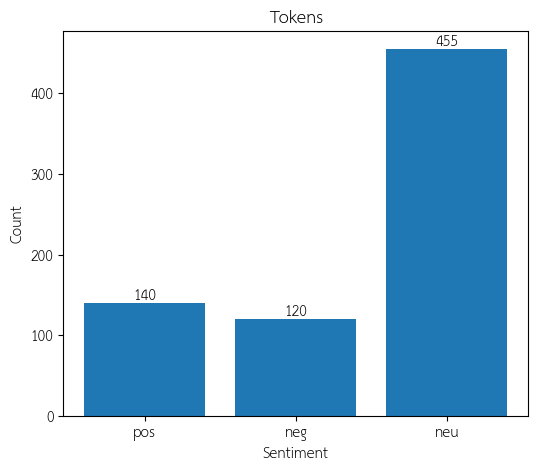

In [117]:
# Graph Tokens
label_counts = df['label_token'].value_counts()

label_counts = label_counts.reindex(['pos', 'neg', 'neu'])

plt.figure(figsize=(6, 5))
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Tokens')

for i, count in enumerate(label_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

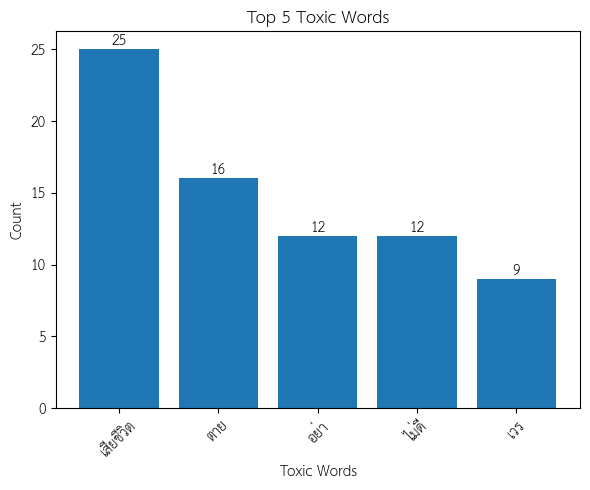

In [124]:
# Negative Words ‡∏û‡∏ö‡∏ö‡πà‡∏≠‡∏¢ 5 ‡∏Ñ‡∏≥
df_neg = df[df['label_token'] == 'neg']


top_neg_words = df_neg['ToxicWords'].explode().value_counts().head(5)


plt.figure(figsize=(6, 5))
plt.bar(top_neg_words.index, top_neg_words.values)
plt.xlabel('Toxic Words')
plt.ylabel('Count')
plt.title('Top 5 Toxic Words')

plt.xticks(rotation=45)

for i, count in enumerate(top_neg_words.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


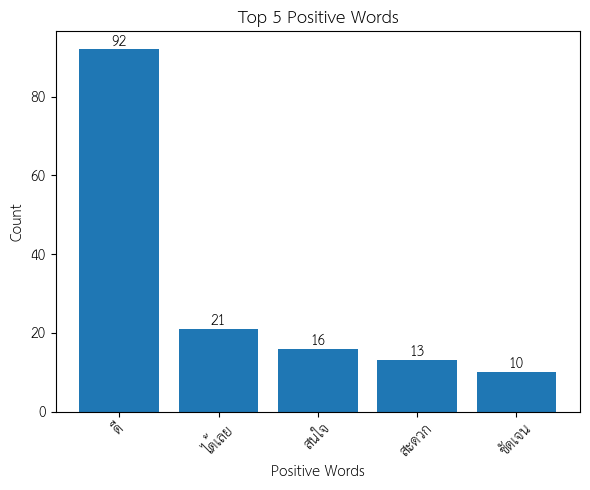

In [120]:
# Top 5 Positive Words
df_neg = df[df['label_token'] == 'pos']

top_neg_words = df_neg['PosWords'].explode().value_counts().head(5)

plt.figure(figsize=(6, 5))
plt.bar(top_neg_words.index, top_neg_words.values)
plt.xlabel('Positive Words')
plt.ylabel('Count')
plt.title('Top 5 Positive Words')

plt.xticks(rotation=45)

for i, count in enumerate(top_pos_words.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [98]:
df.columns

Index(['text', 'source', 'tokens', 'ToxicWordCount', 'ToxicWords',
       'PosWordCount', 'PosWords', 'label_token'],
      dtype='object')

### Graph Contains

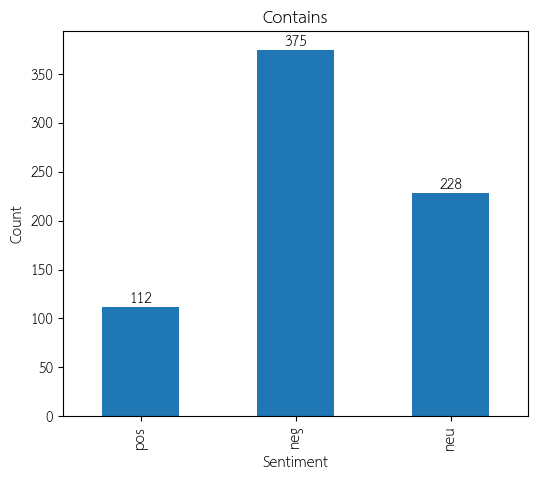

In [113]:
# Graph Contains
label_counts = df1['label_contain'].value_counts()

label_counts = label_counts.reindex(['pos', 'neg', 'neu'])

plt.figure(figsize=(6, 5))
label_counts.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Contains')

for i, count in enumerate(label_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

In [91]:
df1.columns

Index(['text', 'source', 'tokens', 'ToxicWordCount', 'ToxicWords',
       'PosWordCount', 'PosWords', 'contains_toxic_word', 'contains_pos_word',
       'label_contain'],
      dtype='object')

### Tokenize VS Contains

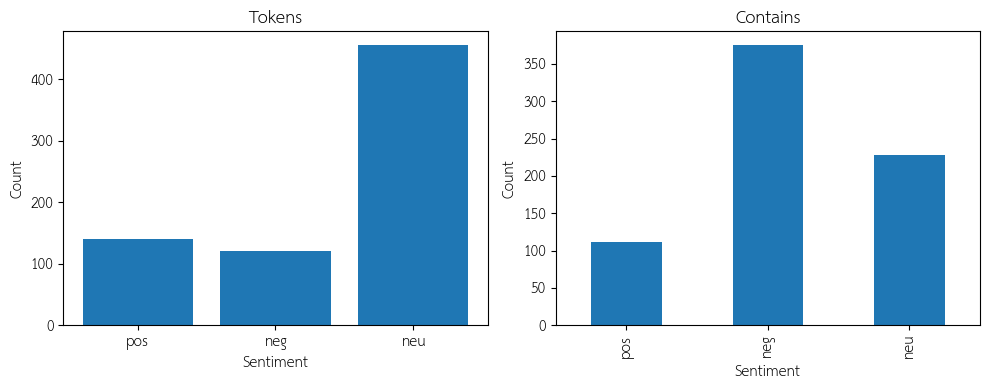

In [112]:
# Tokenize and Contains
label_counts_token = df['label_token'].value_counts().reindex(['pos', 'neg', 'neu'])
label_counts_contain = df1['label_contain'].value_counts().reindex(['pos', 'neg', 'neu'])


plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(label_counts_token.index, label_counts_token.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Tokens')

plt.subplot(1, 2, 2)
label_counts_contain.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Contains')

plt.tight_layout()
plt.show()

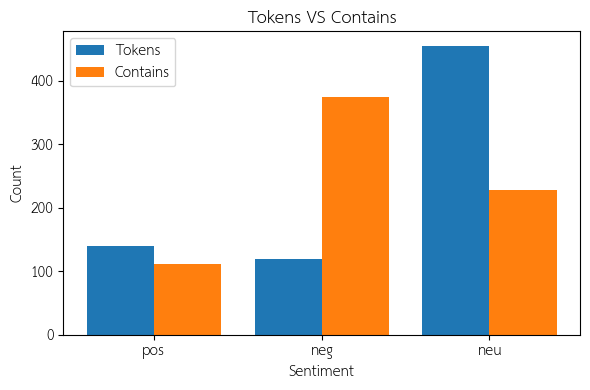

In [111]:
# Tokenize VS Contains
fig, ax = plt.subplots(figsize=(6, 4))

label_counts_token = df['label_token'].value_counts().reindex(['pos', 'neg', 'neu'])
label_counts_contain = df1['label_contain'].value_counts().reindex(['pos', 'neg', 'neu'])

ax.bar(label_counts_token.index, label_counts_token.values, width=0.4, label='Tokens')

ax.bar(np.arange(len(label_counts_contain.index)) + 0.4, label_counts_contain.values, width=0.4, label='Contains')

ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Tokens VS Contains')
ax.set_xticks(np.arange(len(label_counts_token.index)) + 0.2)
ax.set_xticklabels(label_counts_token.index)
ax.legend()

plt.tight_layout()
plt.show()
